In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gradiente Descendente

Esse notebook irá demonstrar a aplicação do algoritmo Gradiente Descendente.

O Gradiente Descendente é um algoritmo de otimização fundamental em Machine Learning, usado para minimizar funções de custo (erros) em modelos, ajustando iterativamente os parâmetros na direção da descida mais acentuada da função.



In [2]:
def calculate_predicted_values(real_x : np.array, intercept : float, slope : float) -> np.array:
    return real_x * slope + intercept

def squared_sum_residuals(real_y : np.array, predicted_y : np.array) -> float:
    return np.sum((real_y - predicted_y) ** 2)

def derivated_sum_squared_residuals_intercept(real_y, predicted_y):
    return np.sum(-2 * (real_y - predicted_y))

def derivated_sum_squared_residuals_slope(real_x, real_y, predicted_y):
    return np.sum(-2 * real_x * (real_y - predicted_y))

def get_tan_line_values(x_range: np.ndarray, current_intercept: float, current_cost: float, gradient: float):
    return current_cost + gradient * (x_range - current_intercept)

## Letra A

In [3]:
def plot_iteration_status(ax1, ax2, 
                          x_real, y_real, y_pred, 
                          intercept_val, cost_val, 
                          b_vals, costs_curve, 
                          tan_x, tan_y, 
                          iteration):
    ax1.clear()
    ax2.clear()

    # --- Gráfico 1: Regressão Linear ---
    for x, y_true, y_p in zip(x_real, y_real, y_pred):
        ax1.plot([x, x], [y_p, y_true], color='red', linestyle='--', linewidth=1, zorder=1)
    ax1.scatter(x_real, y_real, color='blue')
    ax1.plot(x_real, y_pred, color='red', linewidth=1.5, alpha=0.7)
    ax1.set_title("Ajuste da Reta")
    handles, labels = ax1.get_legend_handles_labels()
    ax1.grid(True, alpha=0.5)

    # --- Gráfico 2: Curva de Custo ---
    ax2.plot(b_vals, costs_curve, color='gray', linestyle='--', alpha=0.7, label='Curva de Custo')
    ax2.scatter(intercept_val, cost_val, color='red', s=100, zorder=5, label='Custo Atual')
    ax2.plot(tan_x, tan_y, color='green', linewidth=1.5, label='Tangente')
    ax2.set_title(f"Gradiente (Custo: {cost_val:.2f})")
    ax2.set_xlabel("Intercepto")
    ax2.legend(loc='upper center')
    ax2.grid(True, alpha=0.3)

    plt.suptitle(f"Iteração {iteration}")
    plt.draw()
    plt.show(0.5)

In [4]:
def gradient_descent(
        initial_intercept: float,
        fixed_slope: float,
        real_dots: np.ndarray,
        learn_rate: float,
        max_iterations: int,
) -> np.ndarray :
    
    current_intercept: float = initial_intercept

    history = []

    for i in range(max_iterations):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
        x_real: np.ndarray = real_dots[:, 0]
        y_real: np.ndarray = real_dots[:, 1]
        y_pred: np.ndarray = calculate_predicted_values(
            x_real,
            current_intercept,
            fixed_slope,
        )
        
        b_vals = np.linspace(initial_intercept - 0.5, initial_intercept + 1.5, 100)
        costs_curve = [squared_sum_residuals(y_real, calculate_predicted_values(x_real, b, fixed_slope)) for b in b_vals]
        
        current_cost: float = squared_sum_residuals(y_real, y_pred)
        history.append((current_intercept, current_cost))
        gradient_intercept: float = derivated_sum_squared_residuals_intercept(
            y_real,
            y_pred,
        )

        old_intercept = current_intercept
        
        tan_range = np.linspace(old_intercept - 0.5, old_intercept + 0.5, 10)
        tan_line = get_tan_line_values(tan_range, old_intercept, current_cost, gradient_intercept)

        plot_iteration_status(
            ax1, ax2, 
            x_real, y_real, y_pred, 
            old_intercept, current_cost, 
            b_vals, costs_curve, 
            tan_range, tan_line, 
            i + 1
        )

        step_size: float = gradient_intercept * learn_rate
        current_intercept -= step_size

        print('Interação | Old Intercept | Step Size | New Intercept')
        print(f"{i+1:<3} | {old_intercept:<10.4f} | {step_size:<10.4f} | {current_intercept:<10.4f}")        

        if (-step_size < 0.001):
            print(f'Chegou ao mínimo na interação {i+1}')
            break
    
    return current_intercept, history

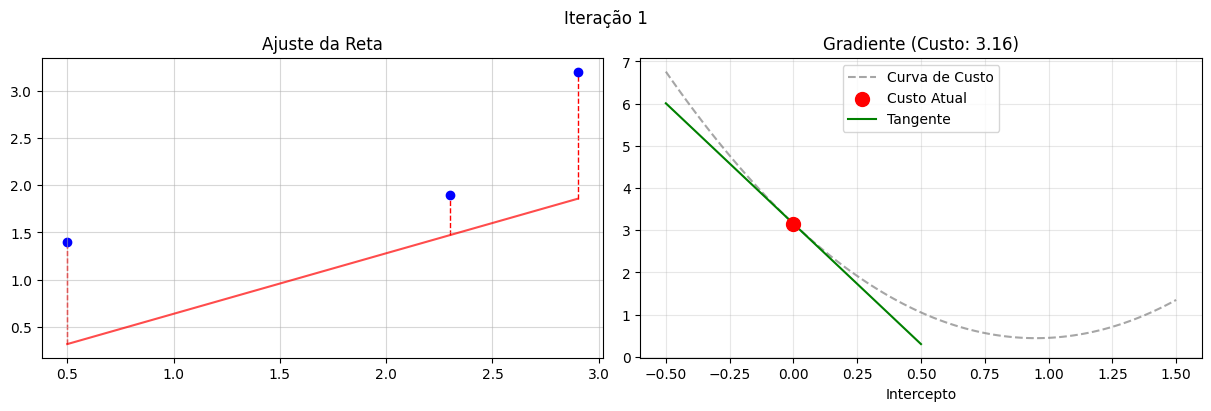

Interação | Old Intercept | Step Size | New Intercept
1   | 0.0000     | -0.5704    | 0.5704    


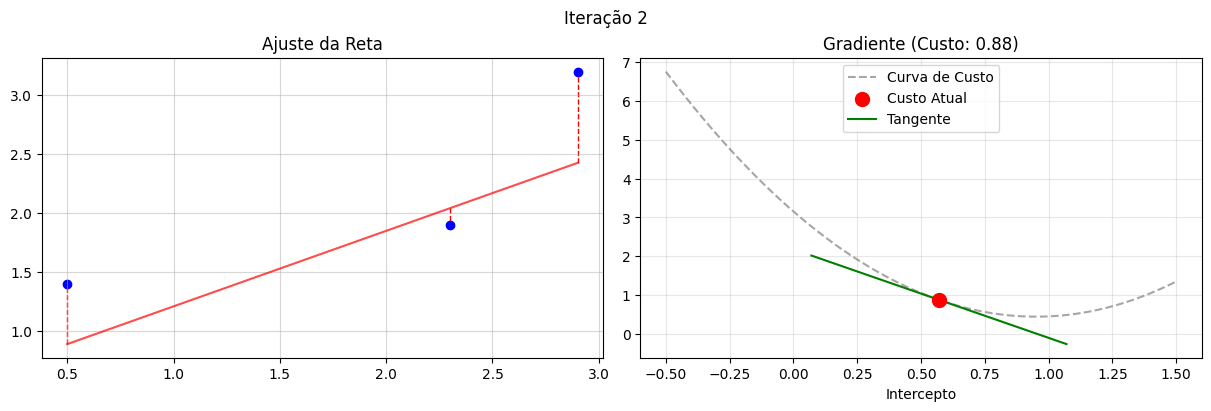

Interação | Old Intercept | Step Size | New Intercept
2   | 0.5704     | -0.2282    | 0.7986    


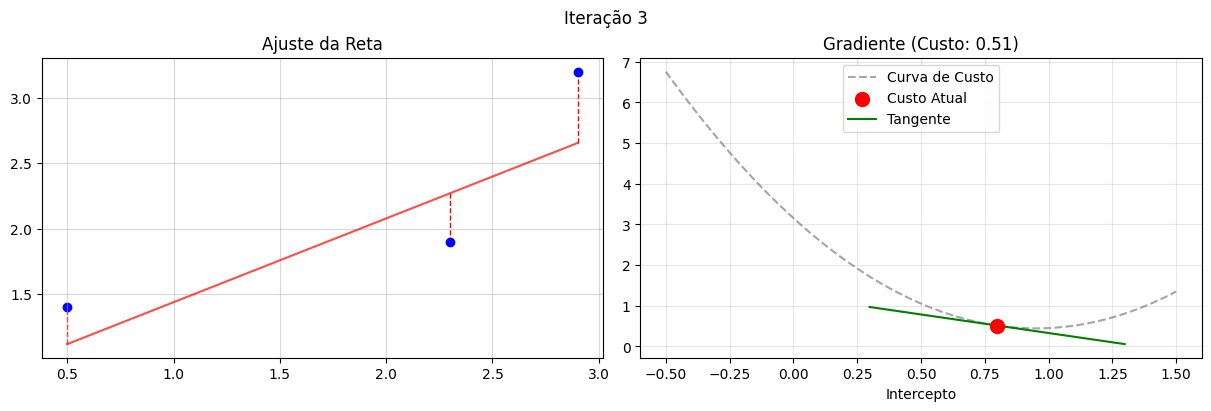

Interação | Old Intercept | Step Size | New Intercept
3   | 0.7986     | -0.0913    | 0.8898    


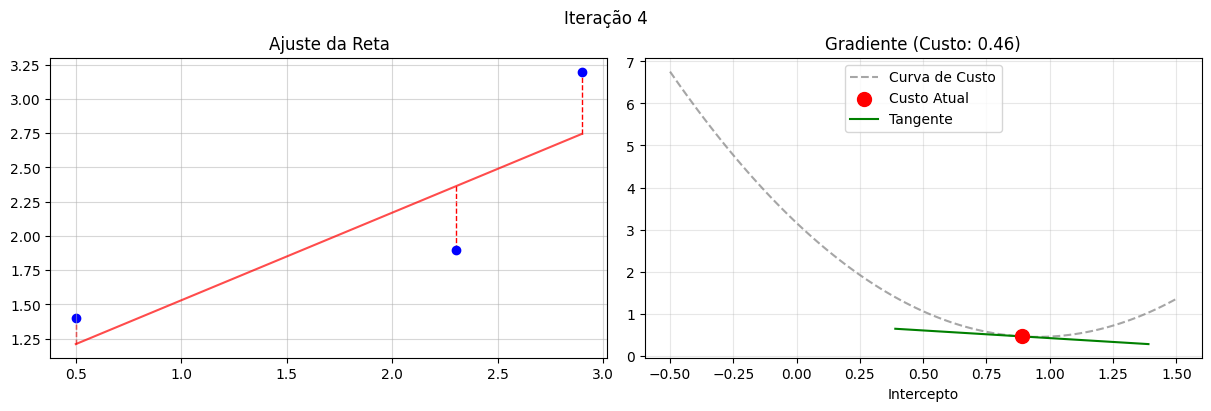

Interação | Old Intercept | Step Size | New Intercept
4   | 0.8898     | -0.0365    | 0.9263    


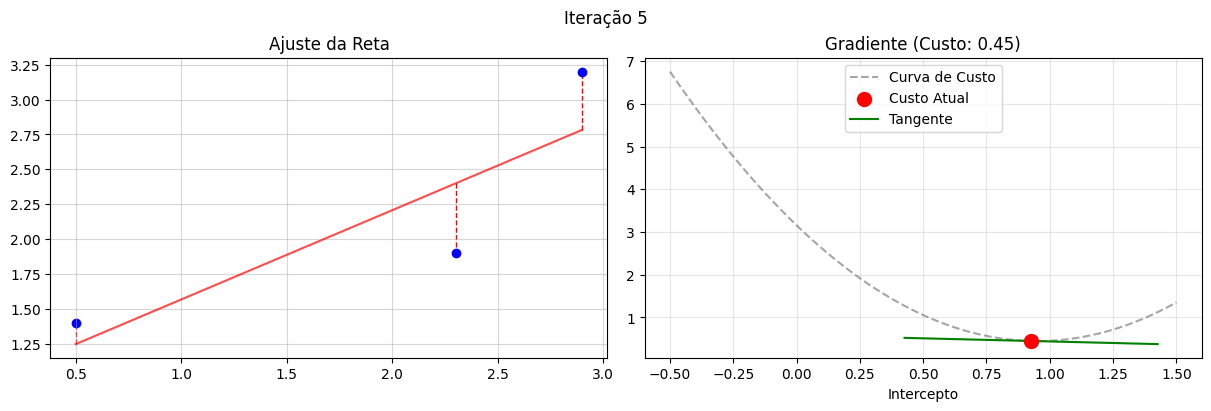

Interação | Old Intercept | Step Size | New Intercept
5   | 0.9263     | -0.0146    | 0.9409    


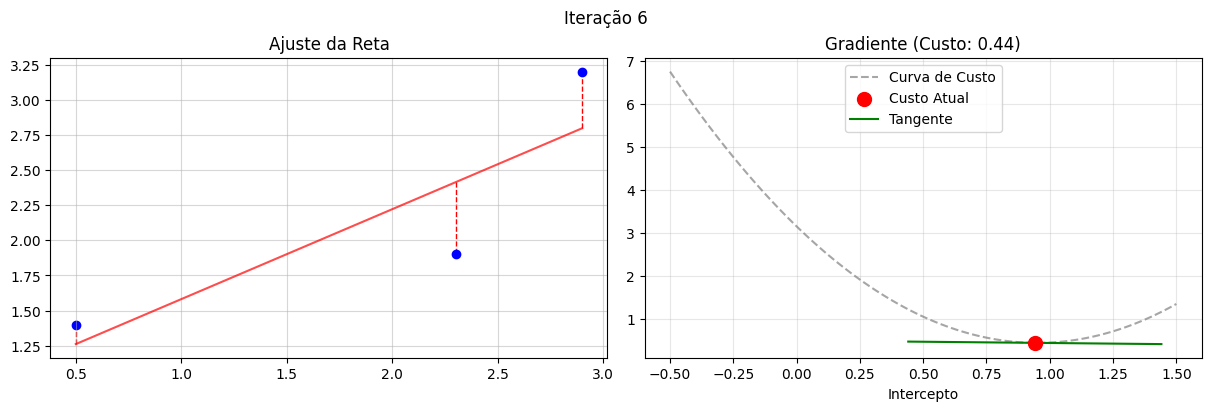

Interação | Old Intercept | Step Size | New Intercept
6   | 0.9409     | -0.0058    | 0.9468    


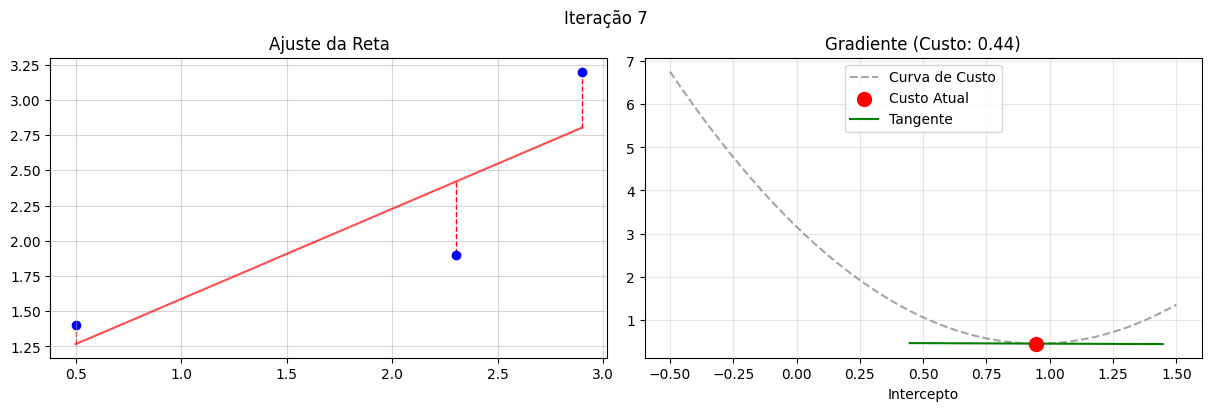

Interação | Old Intercept | Step Size | New Intercept
7   | 0.9468     | -0.0023    | 0.9491    


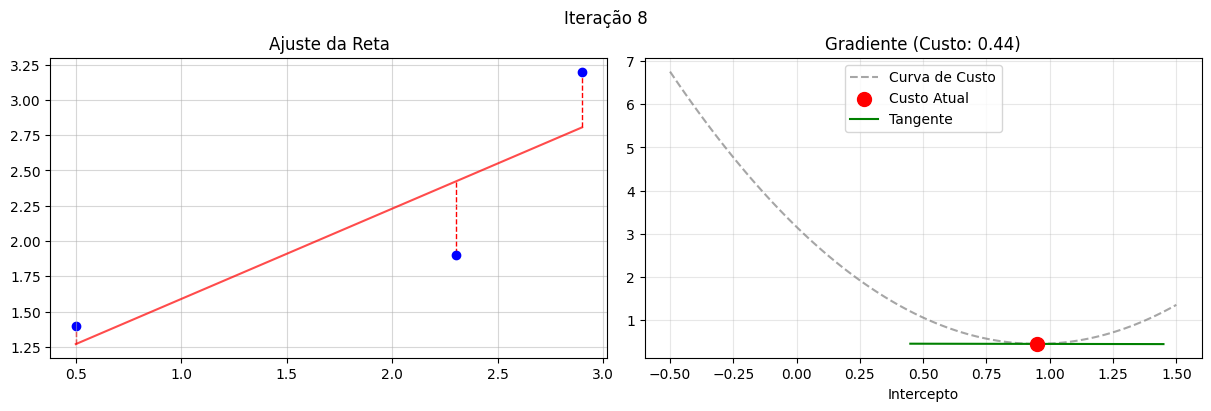

Interação | Old Intercept | Step Size | New Intercept
8   | 0.9491     | -0.0009    | 0.9500    
Chegou ao mínimo na interação 8


In [5]:
fixed_slope = 0.64
initial_intercept = 0.0
learning_rate = 0.1
real_dots = np.array([[0.5, 1.4], [2.3, 1.9],[2.9, 3.2]])
current_intercept, history_intercept = gradient_descent(
    initial_intercept, 
    fixed_slope, 
    real_dots, 
    learning_rate, 
    100)

## Questão B

Método Estocástico

In [16]:
def plot_sgd_status(ax1, ax2, 
                    x_real, y_real,
                    x_sample, y_sample,
                    curr_b, curr_m, global_cost,
                    b_vals, costs_curve,
                    gradient_intercept, 
                    iteration):
    ax1.clear()
    ax2.clear()

    ax1.scatter(x_real, y_real, color='green', alpha=0.3, label='População')
    
    ax1.scatter(x_sample, y_sample, color='orange', s=150, edgecolors='black', zorder=10, label='Amostra SGD')
    
    x_line = np.linspace(min(x_real)-1, max(x_real)+1, 100)
    y_line = calculate_predicted_values(x_line, curr_b, curr_m)
    ax1.plot(x_line, y_line, color='teal', linewidth=2.5, label=f'Modelo (b={curr_b:.2f})')

    y_pred_sample = calculate_predicted_values(x_sample, curr_b, curr_m)
    ax1.plot([x_sample, x_sample], [y_pred_sample, y_sample], color='red', linestyle='--', linewidth=2)

    ax1.set_title(f"Iteração {iteration}: Ajuste pelo Ponto Laranja")
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)

    ax2.plot(b_vals, costs_curve, color='gray', linestyle='--', alpha=0.5, label='Custo Global (Real)')

    ax2.scatter(curr_b, global_cost, color='red', s=100, zorder=10, label='Intercepto Atual')

    ax2.set_title(f"Custo Global vs Gradiente Local")
    ax2.set_xlabel("Intercepto (b)")
    ax2.set_ylabel("Erro")
    ax2.legend(loc='upper center', fontsize='small')
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle("Stochastic Gradient Descent")
    plt.draw()
    plt.pause(0.5)

In [27]:
def stochastic_gradient_descent(
        initial_intercept: float,
        initial_slope: float,
        real_dots: np.ndarray,
        learn_rate: float,
        max_iterations: int,
) -> np.ndarray :
    
    current_intercept: float = initial_intercept
    current_slope: float = initial_slope

    history = []

    for i in range(max_iterations):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
        x_real: np.ndarray = real_dots[:, 0]
        y_real: np.ndarray = real_dots[:, 1]
        
        b_vals = np.linspace(initial_intercept - 0.5, initial_intercept + 2.5, 100)
        costs_curve = [squared_sum_residuals(y_real, calculate_predicted_values(x_real, b, current_slope)) for b in b_vals]

        idx = np.random.randint(0, len(real_dots))
        x_sample = x_real[idx]
        y_sample = y_real[idx]
        
        y_pred_sample = calculate_predicted_values(x_sample, current_intercept, current_slope)
        gradient_intercept = derivated_sum_squared_residuals_intercept(y_sample, y_pred_sample)
        gradient_slope = derivated_sum_squared_residuals_slope(x_sample, y_sample, y_pred_sample)

        y_pred_total = calculate_predicted_values(x_real, current_intercept, current_slope)
        global_cost = squared_sum_residuals(y_real, y_pred_total)
    
        history.append((current_intercept, global_cost))

        plot_sgd_status(
            ax1, ax2,
            x_real, y_real,
            x_sample, y_sample,
            current_intercept, current_slope,
            global_cost,
            b_vals, costs_curve,
            gradient_intercept,
            i + 1
        )

        old_intercept = current_intercept

        step_size_intercept: float = gradient_intercept * learn_rate
        step_size_slope: float = gradient_slope * learn_rate
        current_intercept -= step_size_intercept
        current_slope -= step_size_slope

        print('Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope')
        print(f"{i+1:<3} | {old_intercept:<10.4f} | {step_size_intercept:<10.4f} | {current_intercept:<10.4f} | {step_size_slope:<10.4f} | {current_slope:<10.4f}")        

        if ((current_intercept or current_slope) < 0.001):
            print(f'Chegou ao mínimo na interação {i+1}')
            break
    
    return current_intercept, history

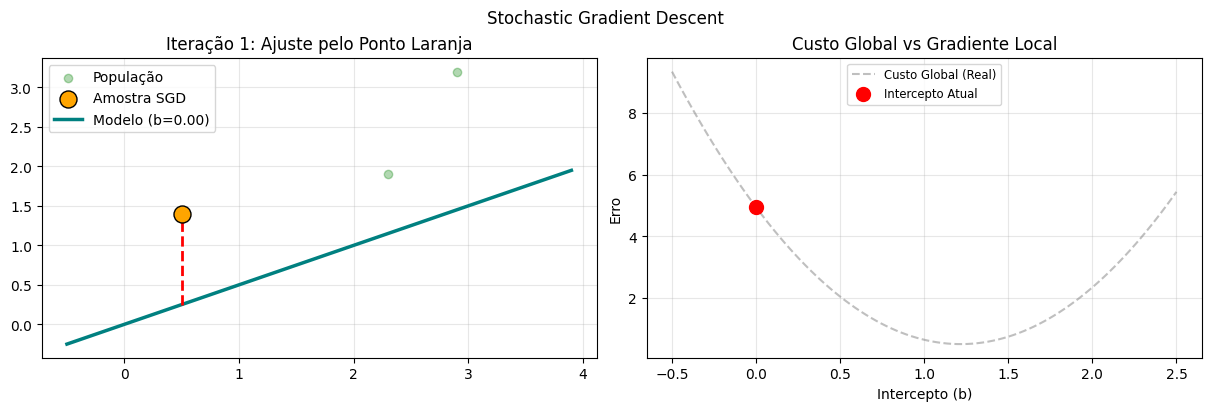

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
1   | 0.0000     | -0.0230    | 0.0230     | -0.0115    | 0.5115    


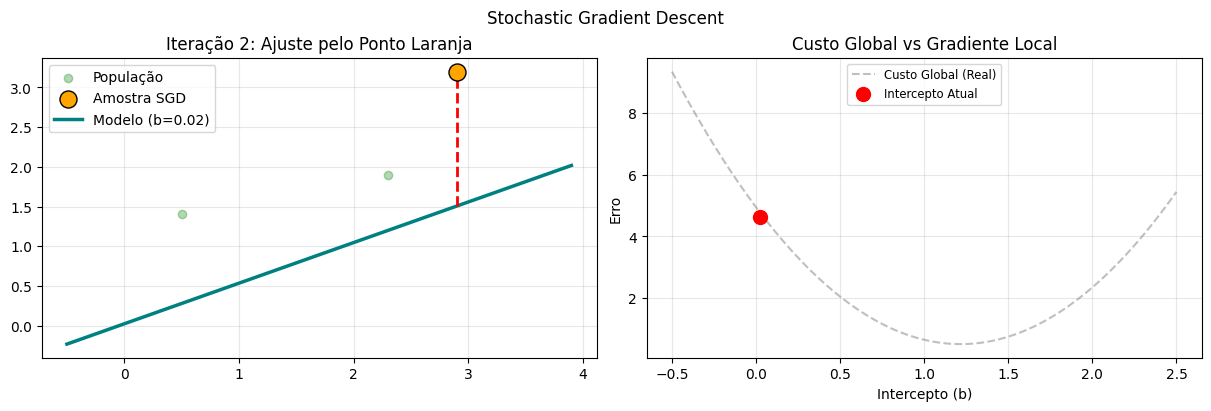

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
2   | 0.0230     | -0.0339    | 0.0569     | -0.0982    | 0.6097    


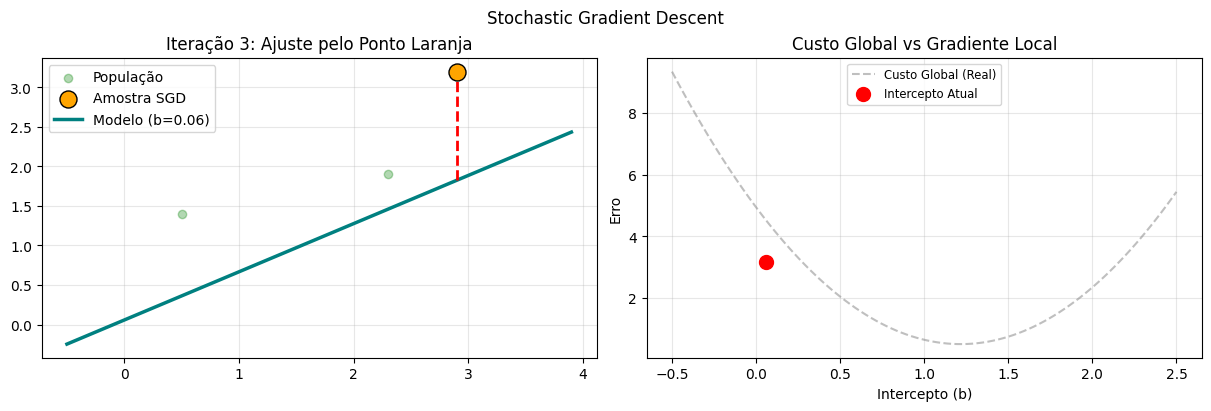

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
3   | 0.0569     | -0.0275    | 0.0844     | -0.0797    | 0.6895    


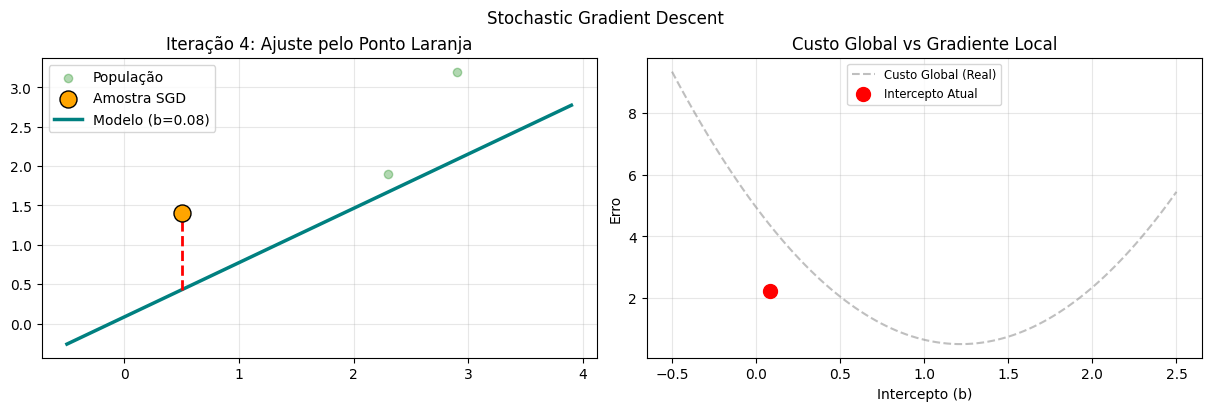

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
4   | 0.0844     | -0.0194    | 0.1038     | -0.0097    | 0.6992    


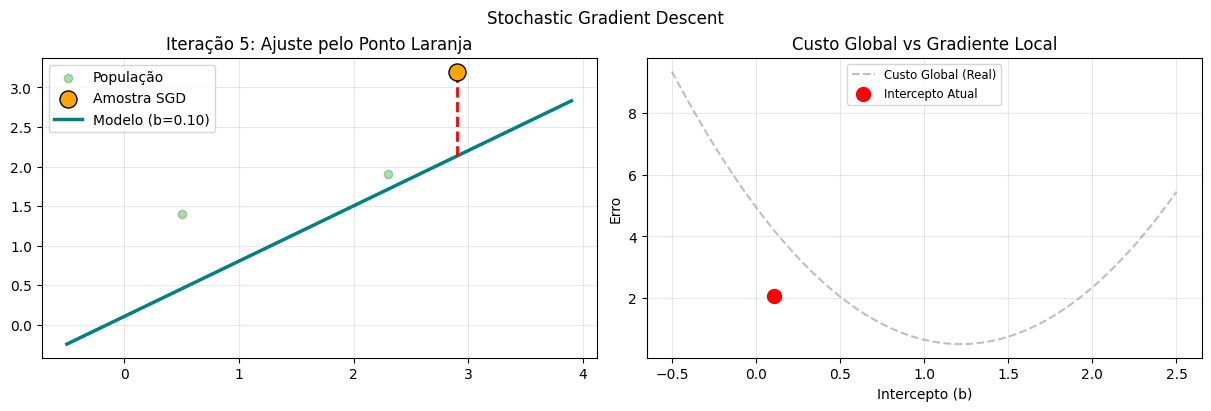

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
5   | 0.1038     | -0.0214    | 0.1252     | -0.0620    | 0.7612    


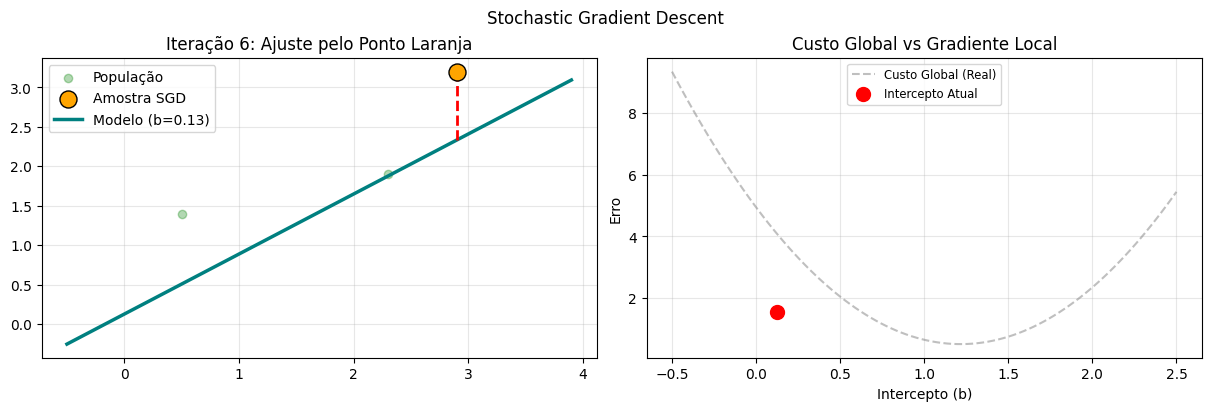

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
6   | 0.1252     | -0.0173    | 0.1425     | -0.0503    | 0.8115    


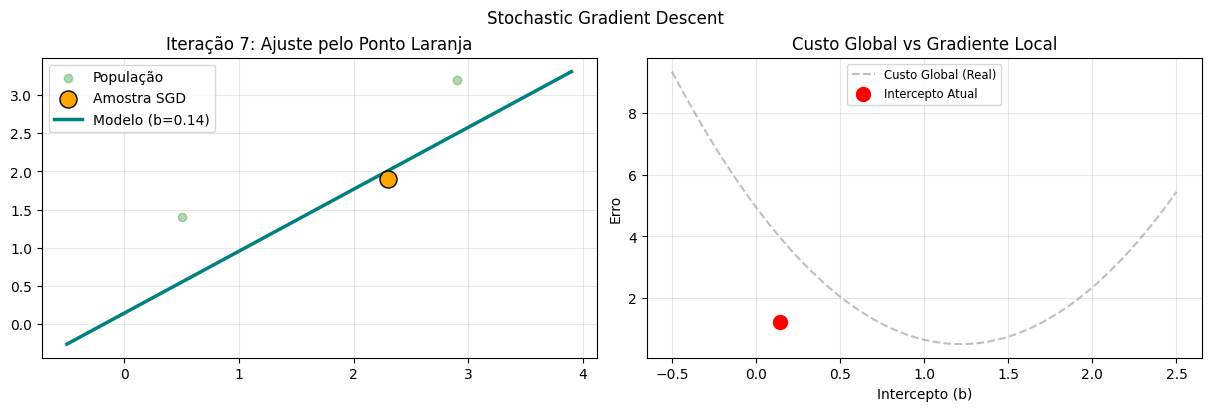

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
7   | 0.1425     | 0.0022     | 0.1403     | 0.0050     | 0.8065    


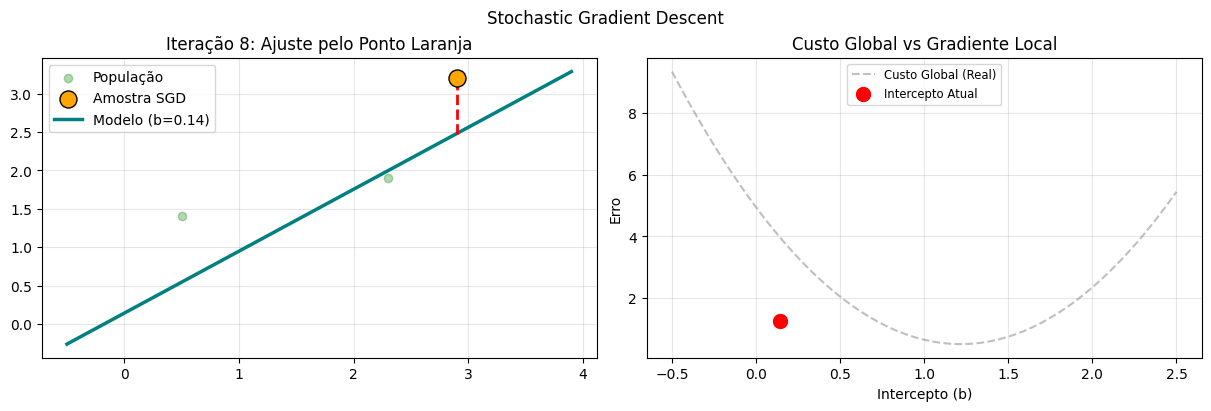

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
8   | 0.1403     | -0.0144    | 0.1548     | -0.0418    | 0.8483    


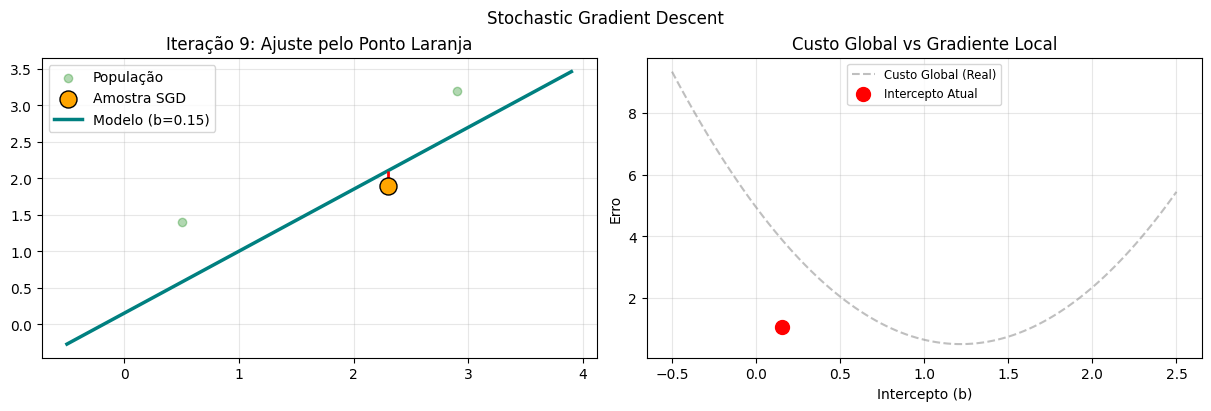

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
9   | 0.1548     | 0.0041     | 0.1506     | 0.0095     | 0.8388    


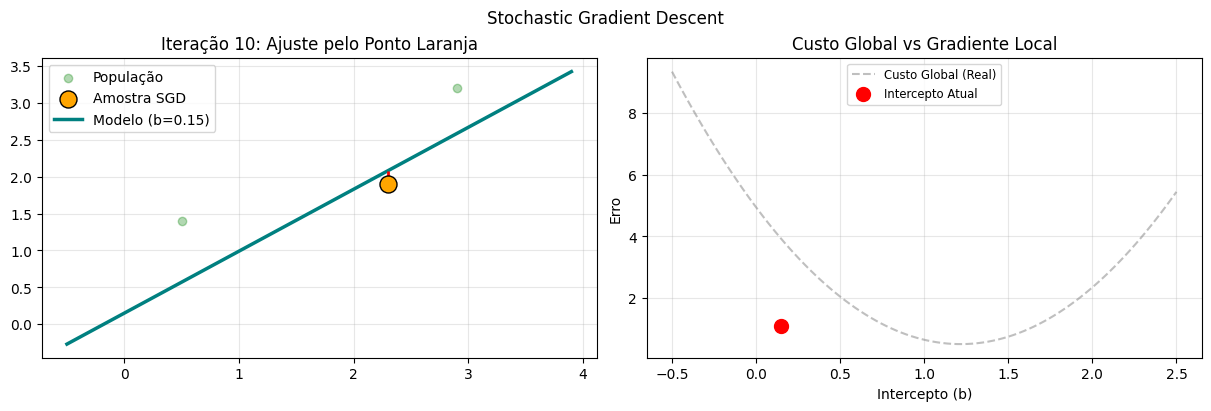

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
10  | 0.1506     | 0.0036     | 0.1470     | 0.0083     | 0.8305    


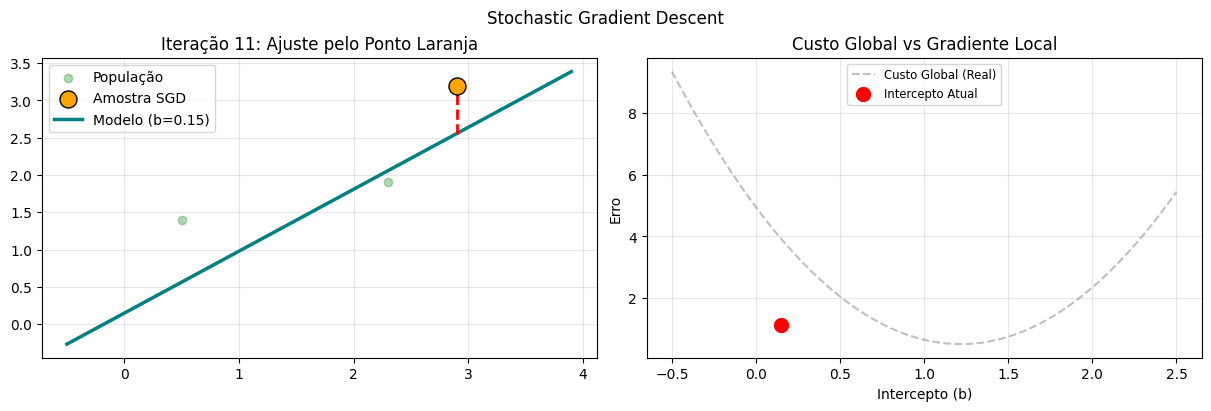

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
11  | 0.1470     | -0.0129    | 0.1599     | -0.0374    | 0.8679    


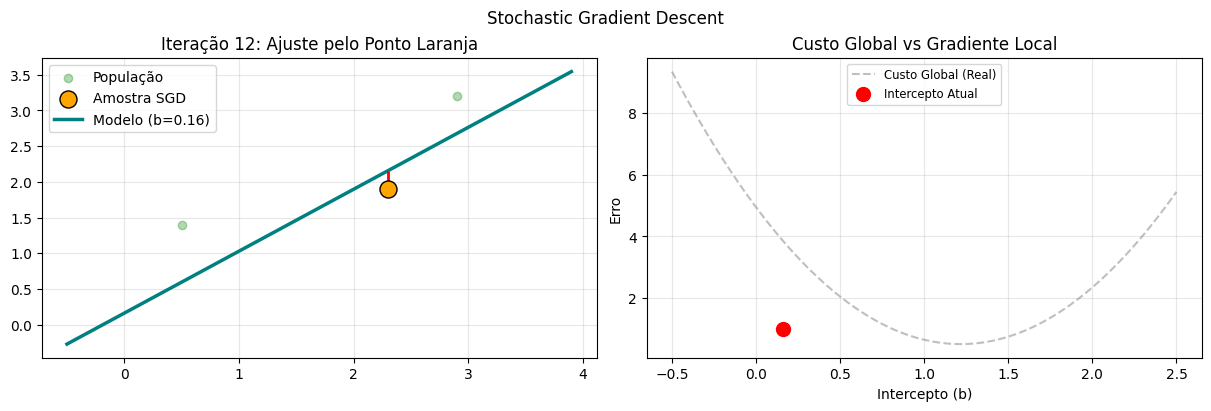

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
12  | 0.1599     | 0.0051     | 0.1548     | 0.0118     | 0.8561    


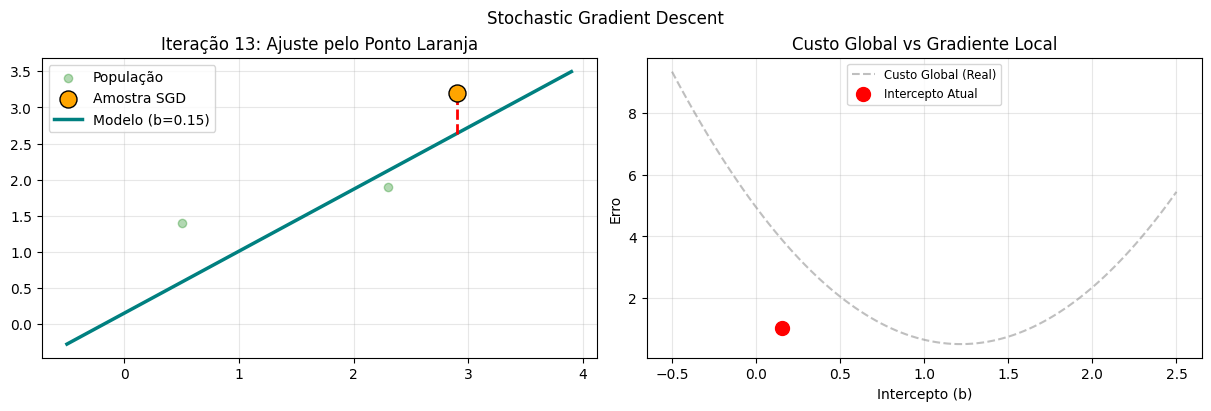

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
13  | 0.1548     | -0.0112    | 0.1661     | -0.0326    | 0.8888    


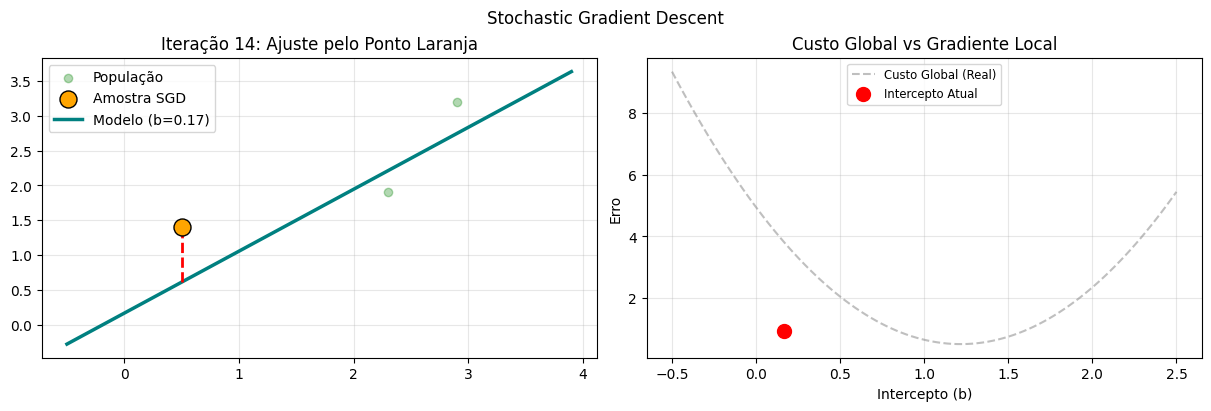

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
14  | 0.1661     | -0.0158    | 0.1818     | -0.0079    | 0.8966    


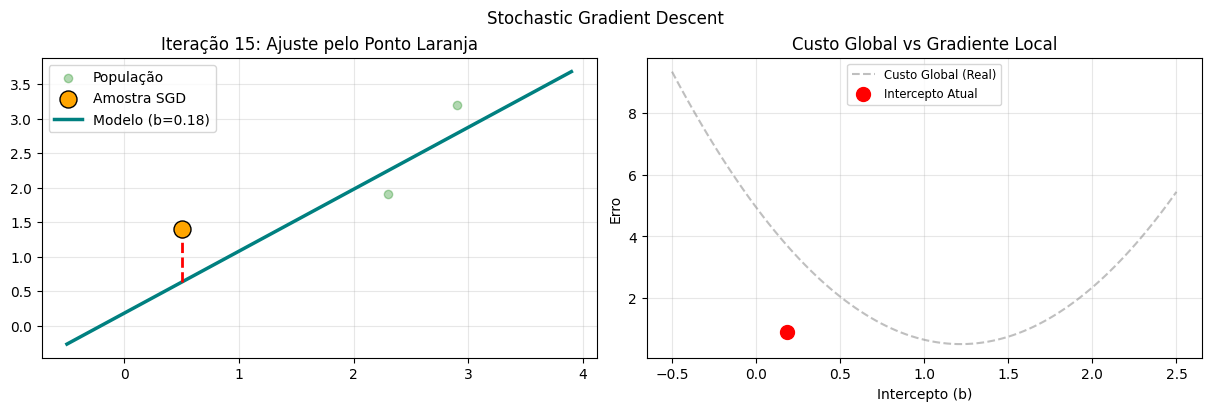

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
15  | 0.1818     | -0.0154    | 0.1972     | -0.0077    | 0.9043    


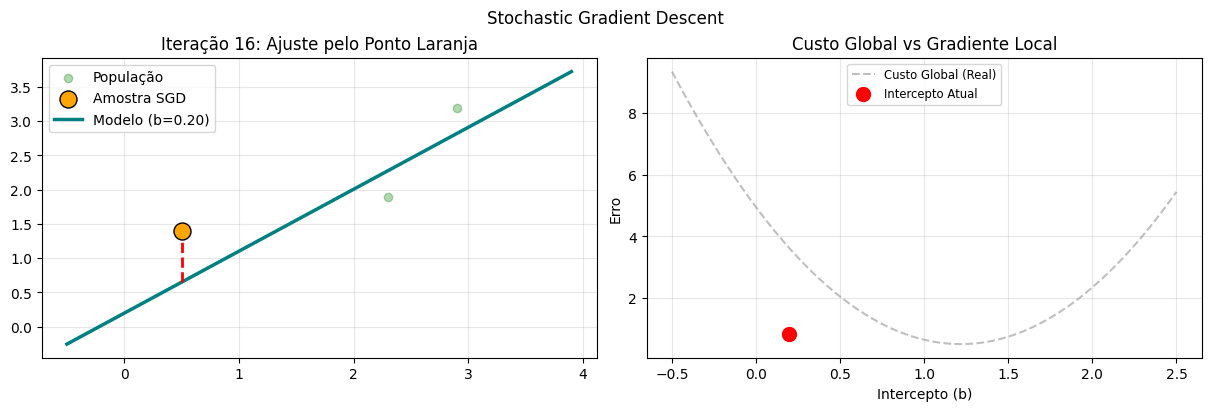

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
16  | 0.1972     | -0.0150    | 0.2123     | -0.0075    | 0.9119    


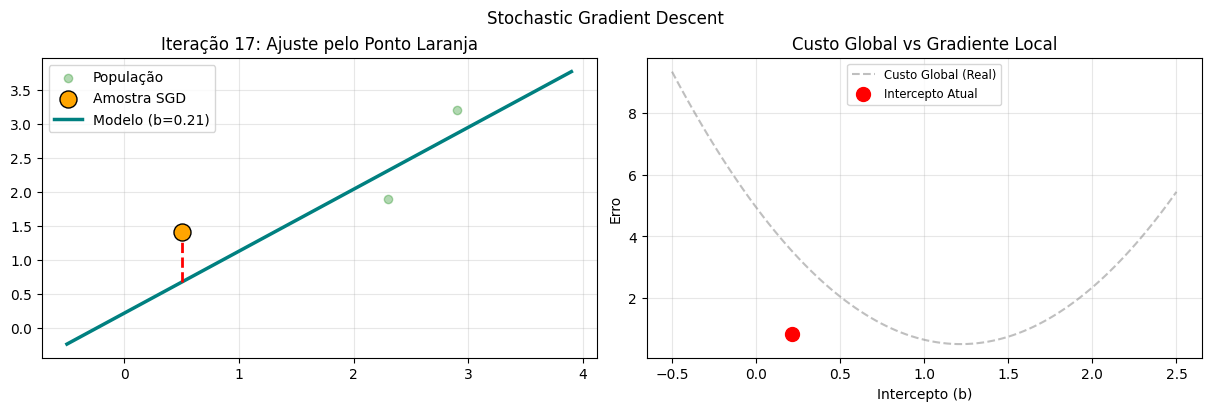

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
17  | 0.2123     | -0.0146    | 0.2269     | -0.0073    | 0.9192    


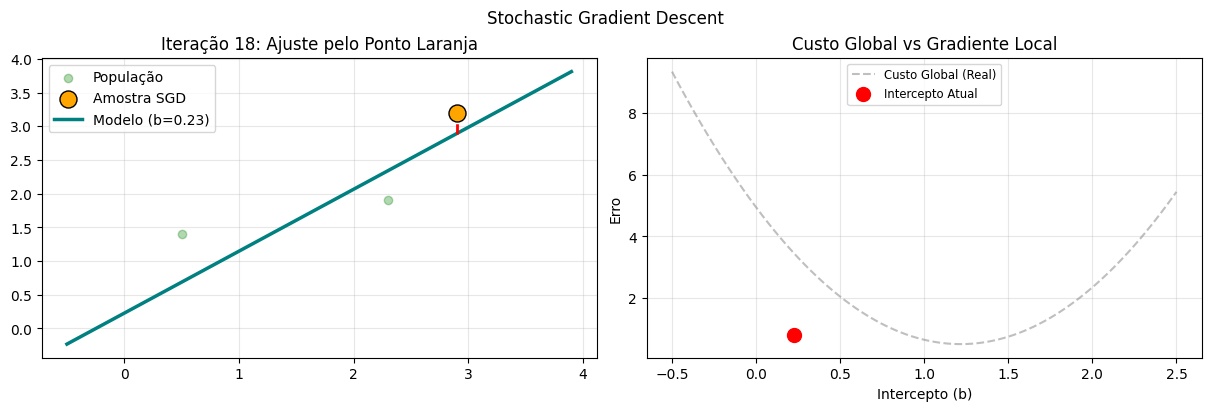

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
18  | 0.2269     | -0.0062    | 0.2330     | -0.0178    | 0.9370    


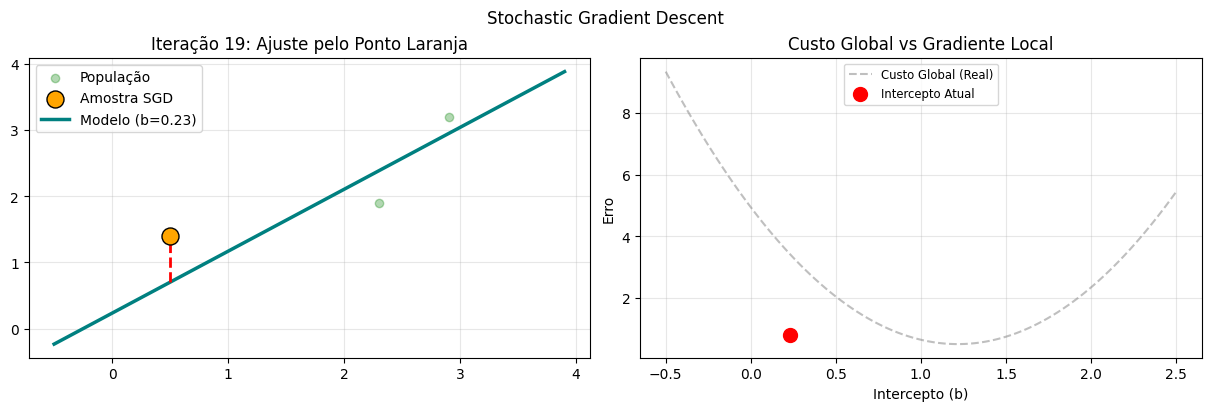

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
19  | 0.2330     | -0.0140    | 0.2470     | -0.0070    | 0.9440    


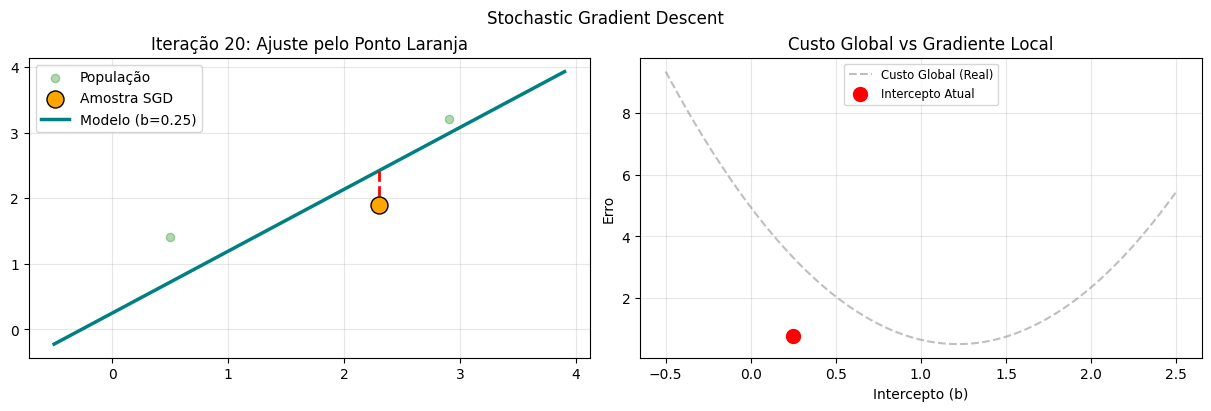

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
20  | 0.2470     | 0.0104     | 0.2366     | 0.0238     | 0.9202    


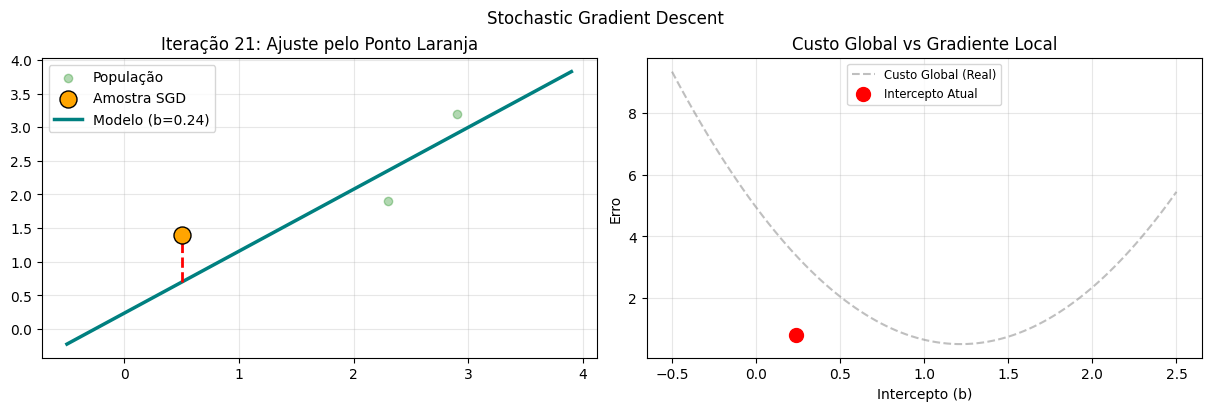

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
21  | 0.2366     | -0.0141    | 0.2507     | -0.0070    | 0.9272    


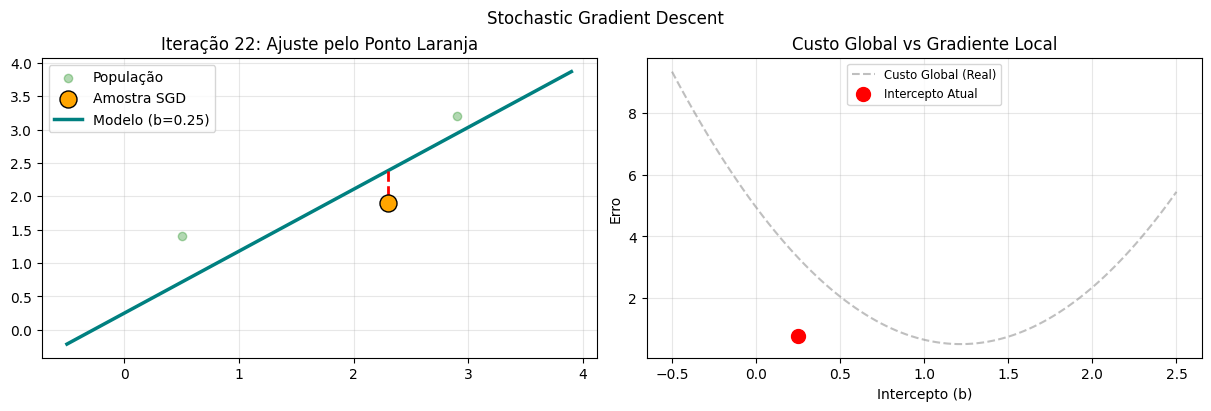

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
22  | 0.2507     | 0.0097     | 0.2410     | 0.0222     | 0.9050    


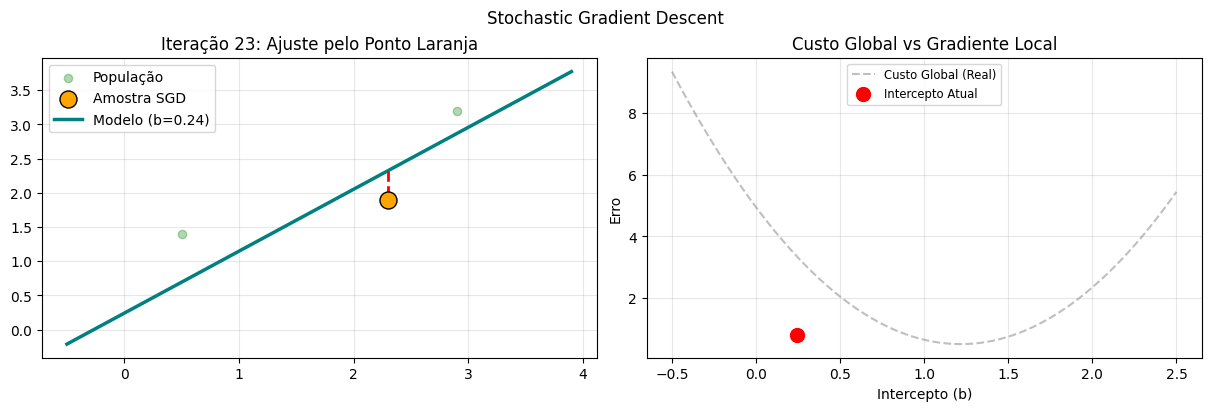

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
23  | 0.2410     | 0.0084     | 0.2326     | 0.0194     | 0.8855    


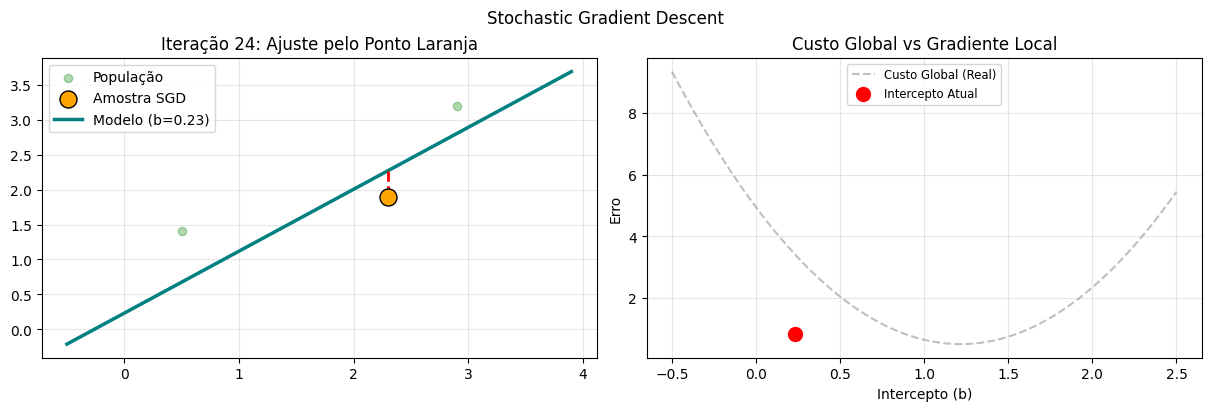

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
24  | 0.2326     | 0.0074     | 0.2252     | 0.0170     | 0.8685    


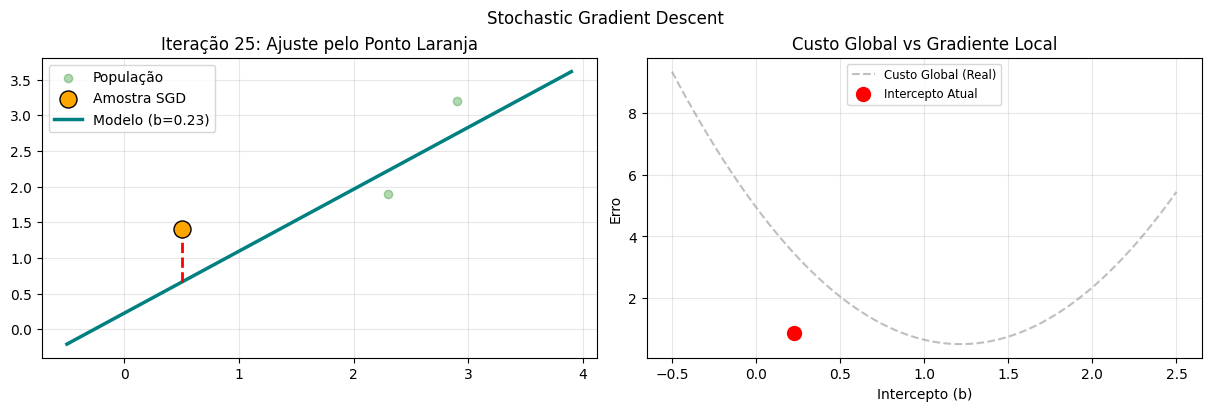

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
25  | 0.2252     | -0.0148    | 0.2400     | -0.0074    | 0.8759    


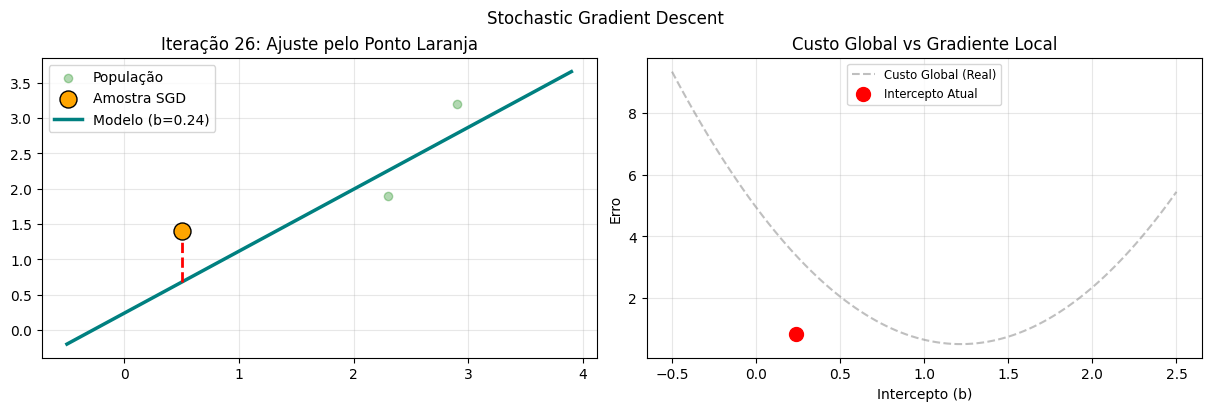

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
26  | 0.2400     | -0.0144    | 0.2545     | -0.0072    | 0.8832    


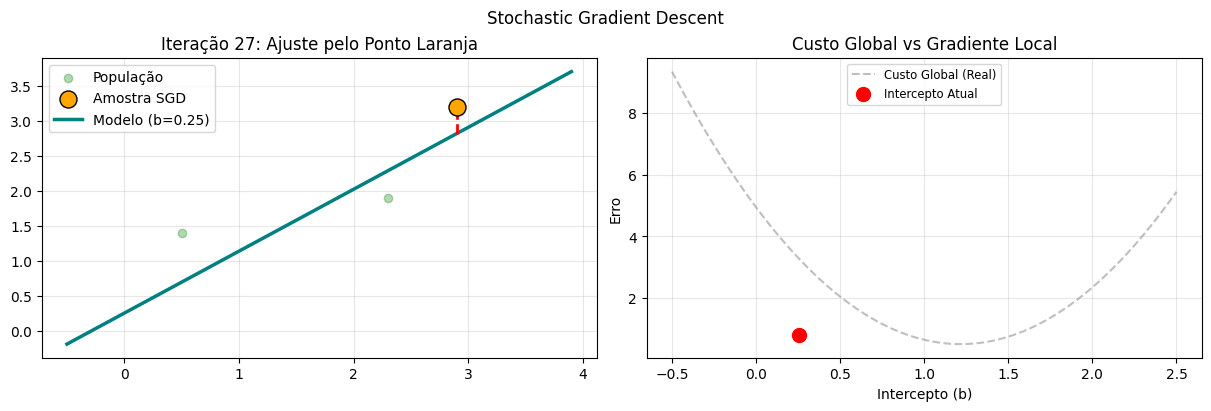

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
27  | 0.2545     | -0.0077    | 0.2621     | -0.0223    | 0.9055    


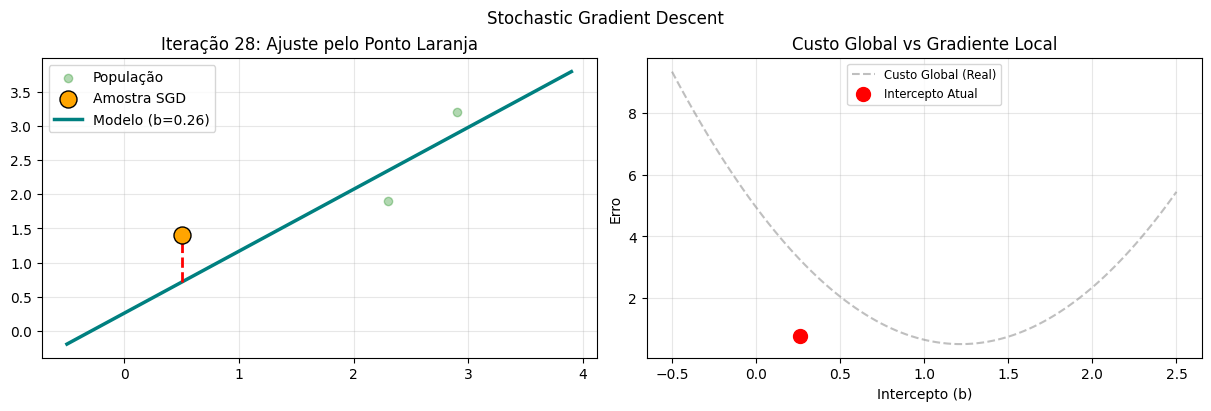

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
28  | 0.2621     | -0.0137    | 0.2758     | -0.0069    | 0.9123    


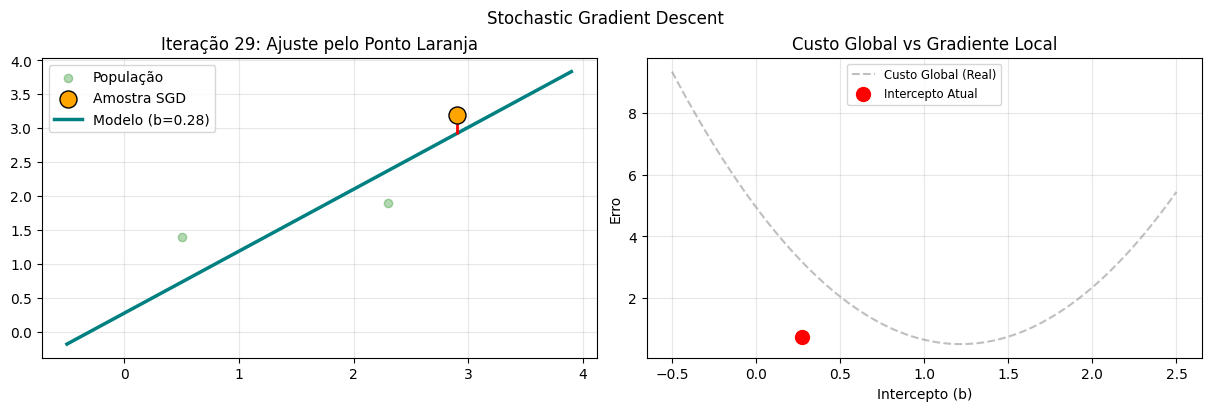

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
29  | 0.2758     | -0.0056    | 0.2814     | -0.0162    | 0.9285    


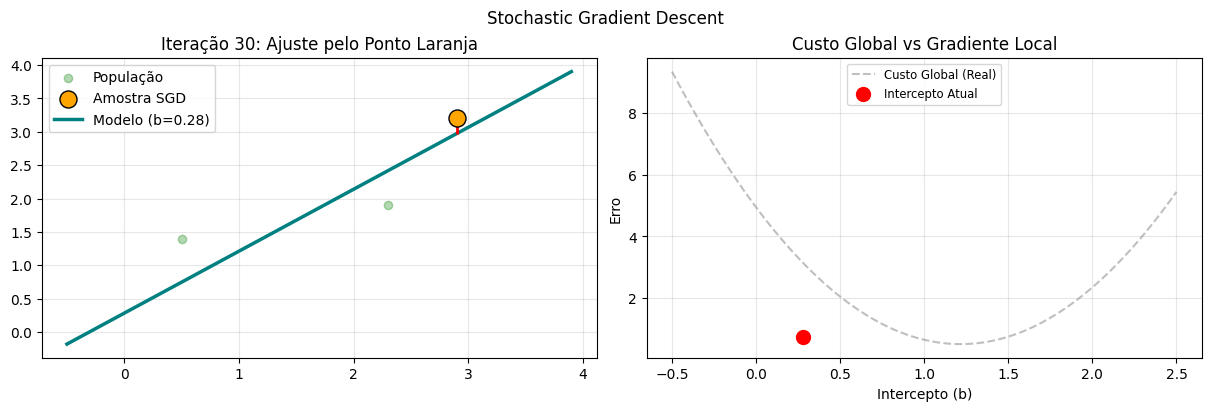

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
30  | 0.2814     | -0.0045    | 0.2859     | -0.0131    | 0.9416    


(np.float64(0.28593923050756076),
 [(0.0, np.float64(4.947500000000001)),
  (np.float64(0.023), np.float64(4.616422187500002)),
  (np.float64(0.056873000000000014), np.float64(3.162605519980956)),
  (np.float64(0.08437110140000002), np.float64(2.2412386709339676)),
  (np.float64(0.10378891743140002), np.float64(2.0733137481662616)),
  (np.float64(0.12516040316238142), np.float64(1.5527838509149918)),
  (np.float64(0.14250977527879213), np.float64(1.23325535524582)),
  (np.float64(0.14033170264089198), np.float64(1.262266193656283)),
  (np.float64(0.15475003926764808), np.float64(1.0590788432957128)),
  (np.float64(0.15063419532905137), np.float64(1.1016510355166569)),
  (np.float64(0.14703612455793014), np.float64(1.1417268628999175)),
  (np.float64(0.15992424474800146), np.float64(0.9890914756910578)),
  (np.float64(0.15480177364273034), np.float64(1.0341526692522354)),
  (np.float64(0.16605013668057883), np.float64(0.9280950457838981)),
  (np.float64(0.18184162081726674), np.float64(

In [25]:
real_dots = np.array([[0.5, 1.4], [2.3, 1.9],[2.9, 3.2]])

stochastic_gradient_descent(
        initial_intercept=0.0,
        initial_slope=0.5,    
        real_dots=real_dots,
        learn_rate=0.01,      
        max_iterations=30
    )

Método Mini-batch


In [28]:
def plot_mini_batch_status(ax1, ax2, 
                    x_real, y_real,
                    x_sample, y_sample,
                    curr_b, curr_m, global_cost,
                    b_vals, costs_curve,
                    gradient_intercept, 
                    iteration):
    ax1.clear()
    ax2.clear()

    ax1.scatter(x_real, y_real, color='green', alpha=0.3, label='População')
    
    ax1.scatter(x_sample, y_sample, color='orange', s=150, edgecolors='black', zorder=10, label='Amostra SGD')
    
    x_line = np.linspace(min(x_real)-1, max(x_real)+1, 100)
    y_line = calculate_predicted_values(x_line, curr_b, curr_m)
    ax1.plot(x_line, y_line, color='teal', linewidth=2.5, label=f'Modelo (b={curr_b:.2f})')

    y_pred_sample = calculate_predicted_values(x_sample, curr_b, curr_m)
    ax1.plot([x_sample, x_sample], [y_pred_sample, y_sample], color='red', linestyle='--', linewidth=2)

    ax1.set_title(f"Iteração {iteration}: Ajuste pelo Ponto Laranja")
    ax1.legend(loc='upper left')
    ax1.grid(True, alpha=0.3)

    ax2.plot(b_vals, costs_curve, color='gray', linestyle='--', alpha=0.5, label='Custo Global (Real)')

    ax2.scatter(curr_b, global_cost, color='red', s=100, zorder=10, label='Intercepto Atual')

    ax2.set_title(f"Custo Global vs Gradiente Local")
    ax2.set_xlabel("Intercepto (b)")
    ax2.set_ylabel("Erro")
    ax2.legend(loc='upper center', fontsize='small')
    ax2.grid(True, alpha=0.3)
    
    plt.suptitle("Stochastic Gradient Descent")
    plt.draw()
    plt.pause(0.5)

In [29]:
def minibatch_gradient_descent(
    initial_intercept: float,
    initial_slope: float,
    real_dots: np.ndarray,
    learn_rate: float,
    max_iterations: int,
    batch_size: int = 2
):
    current_intercept: float = initial_intercept
    current_slope: float = initial_slope

    history = []
    
    x_total = real_dots[:, 0]
    y_total = real_dots[:, 1]
    total_len = len(real_dots)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)
    random_indices = np.random.choice(total_len, batch_size, replace=False)
        
    for i in range(max_iterations):    
        x_batch = x_total[random_indices]
        y_batch = y_total[random_indices]
                
        b_vals = np.linspace(initial_intercept - 0.5, initial_intercept + 2.5, 100)
        costs_curve = [squared_sum_residuals(y_real, calculate_predicted_values(x_real, b, current_slope)) for b in b_vals]
        
        y_pred_batch = calculate_predicted_values(x_batch, current_intercept, slope)
        
        gradient_intercept = derivated_sum_squared_residuals_intercept(y_batch, y_pred_batch)
        gradient_slope = derivated_sum_squared_residuals_slope(x_batch, y_batch, y_pred_batch)

        plot_mini_batch_status(ax1, ax2, 
                            x_real, y_real,
                            x_sample, y_sample,
                            curr_b, curr_m, global_cost,
                            b_vals, costs_curve,
                            gradient_intercept, 
                            iteration)

        current_intercept -= (gradient_intercept * learn_rate)
        current_slope -= (gradient_slope * learn_rate)

        y_pred_total = calculate_predicted_values(x_total, current_intercept, slope)
        global_cost = squared_sum_residuals(y_total, y_pred_total)
        
        history.append((current_intercept, global_cost))
            
    return current_intercept, history

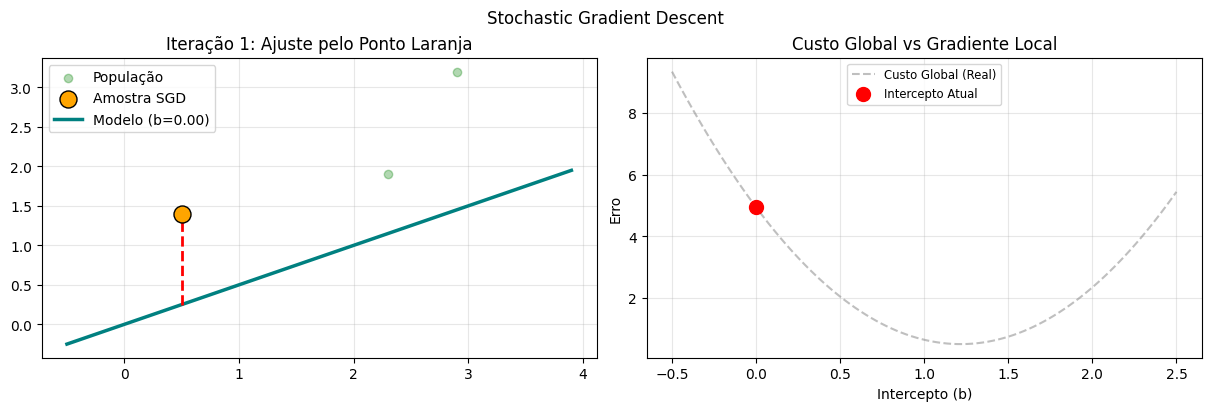

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
1   | 0.0000     | -0.0230    | 0.0230     | -0.0115    | 0.5115    


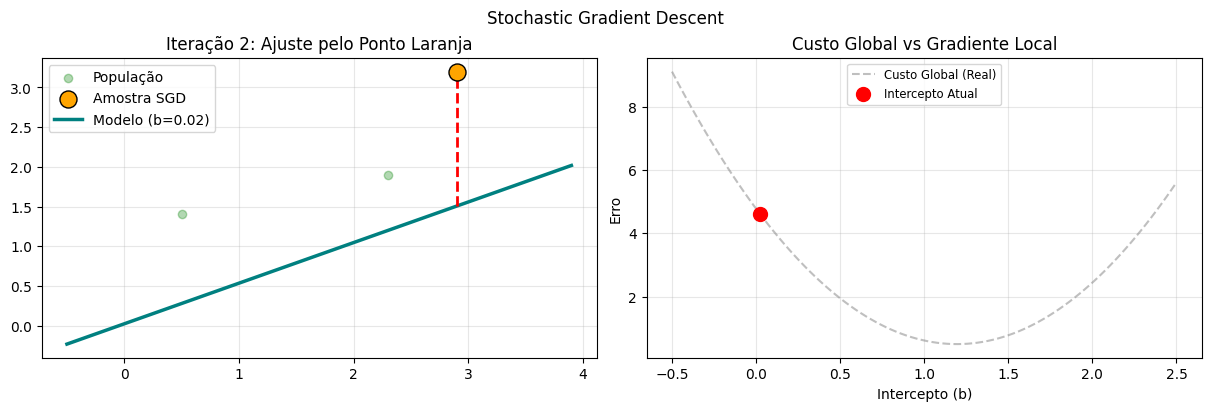

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
2   | 0.0230     | -0.0339    | 0.0569     | -0.0982    | 0.6097    


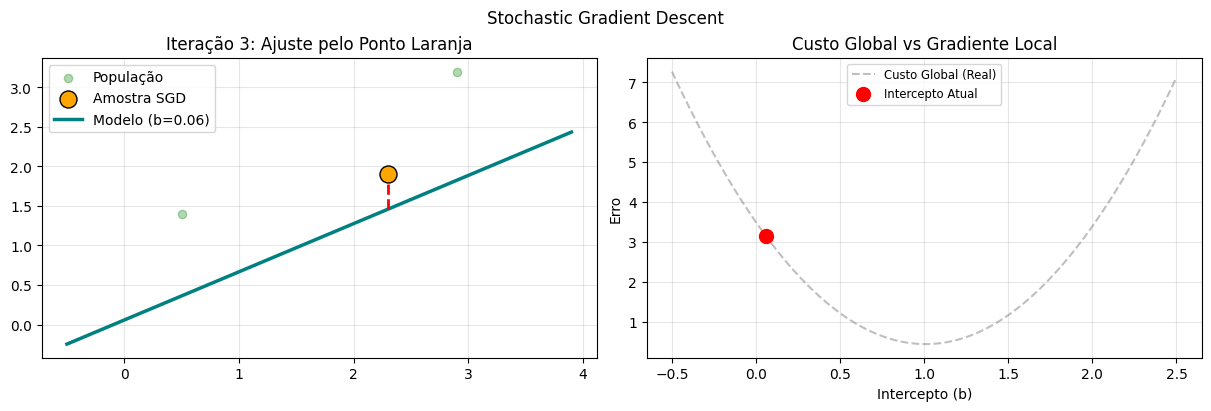

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
3   | 0.0569     | -0.0088    | 0.0657     | -0.0203    | 0.6300    


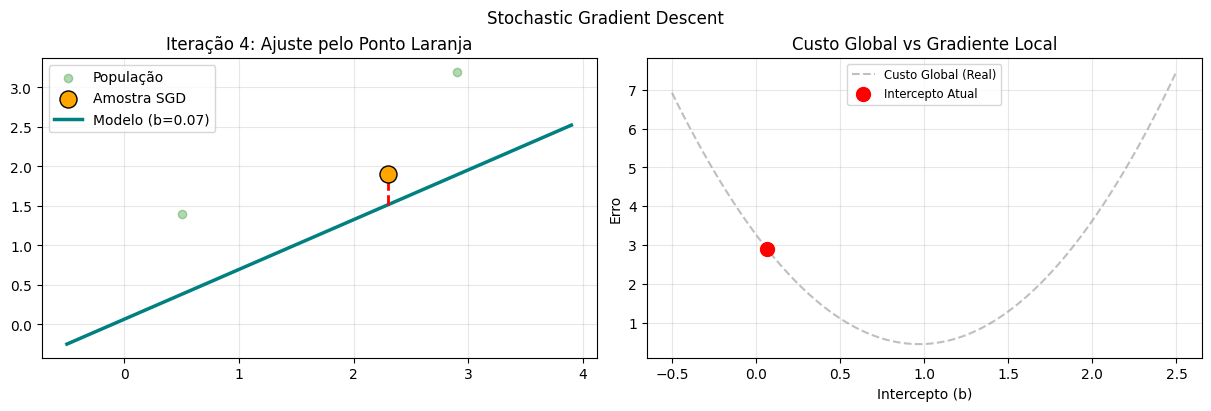

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
4   | 0.0657     | -0.0077    | 0.0734     | -0.0177    | 0.6477    


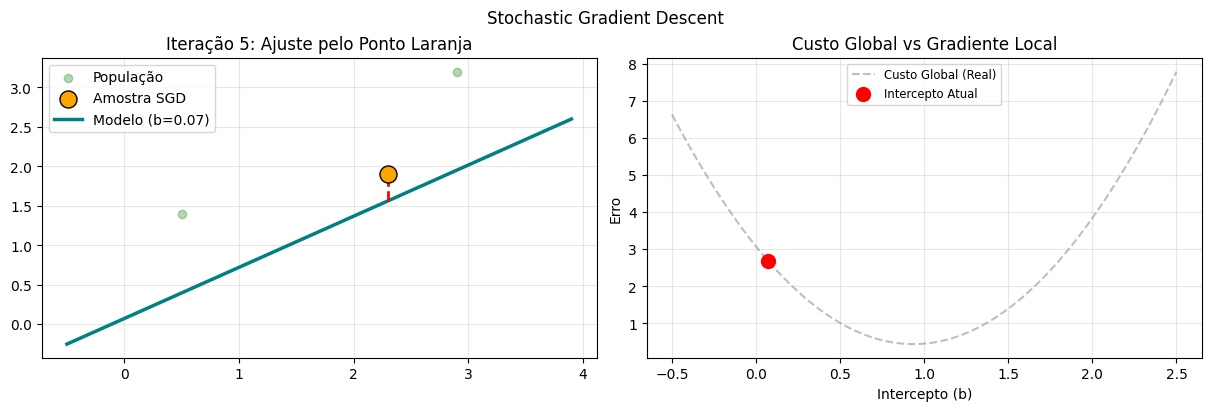

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
5   | 0.0734     | -0.0067    | 0.0801     | -0.0155    | 0.6632    


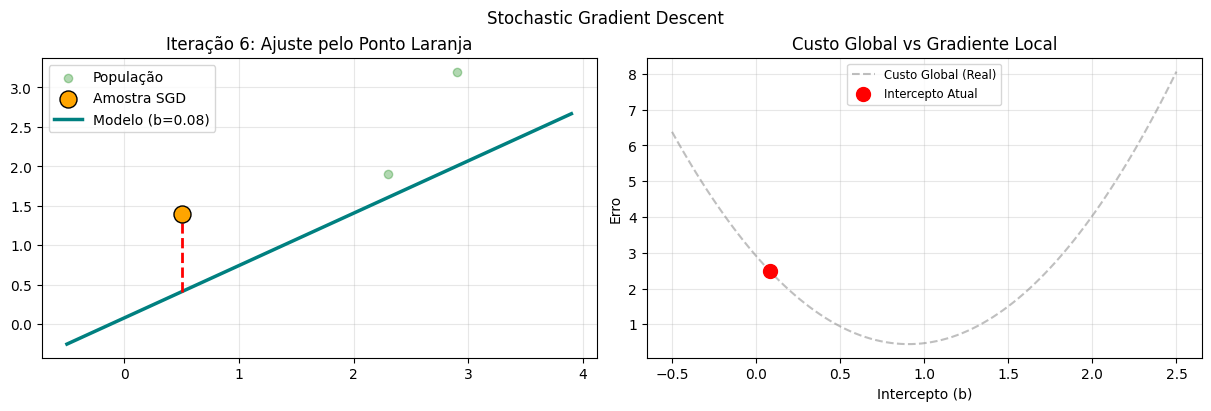

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
6   | 0.0801     | -0.0198    | 0.0999     | -0.0099    | 0.6731    


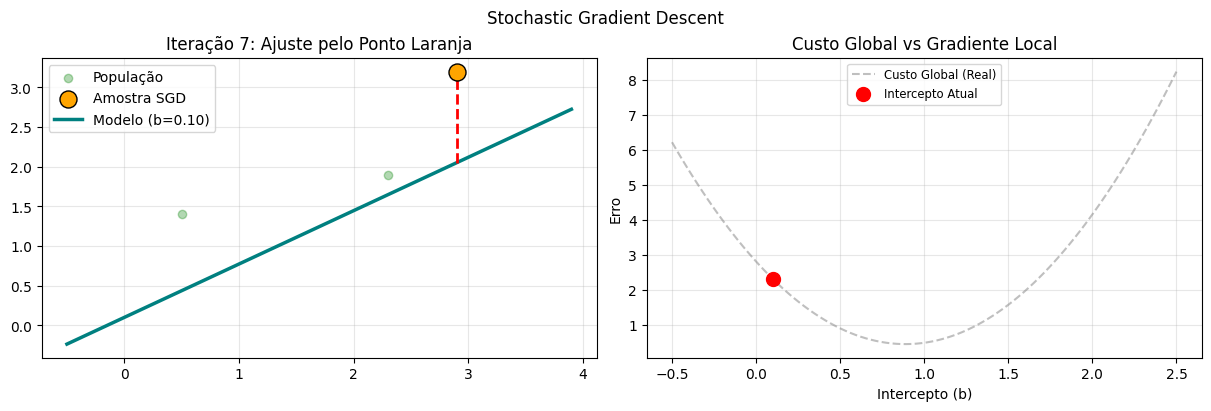

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
7   | 0.0999     | -0.0230    | 0.1229     | -0.0666    | 0.7397    


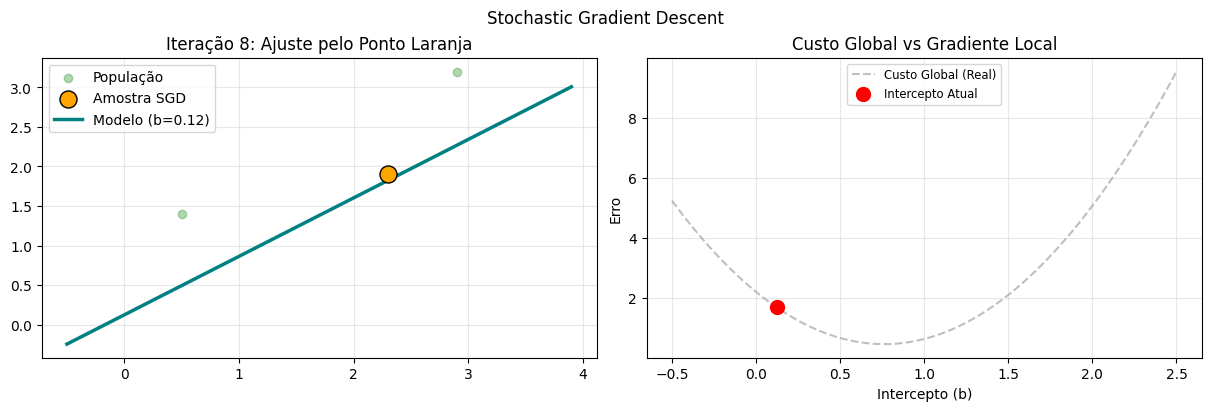

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
8   | 0.1229     | -0.0015    | 0.1244     | -0.0035    | 0.7432    


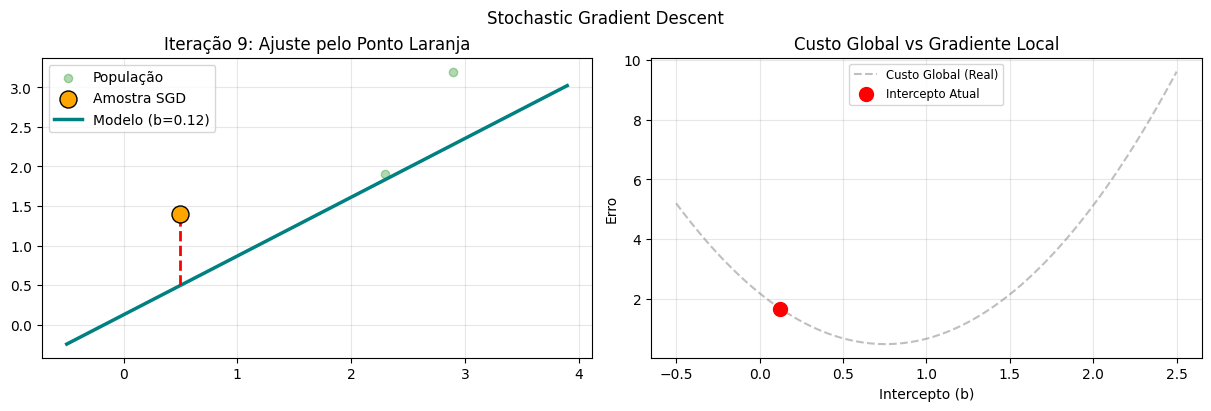

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
9   | 0.1244     | -0.0181    | 0.1425     | -0.0090    | 0.7522    


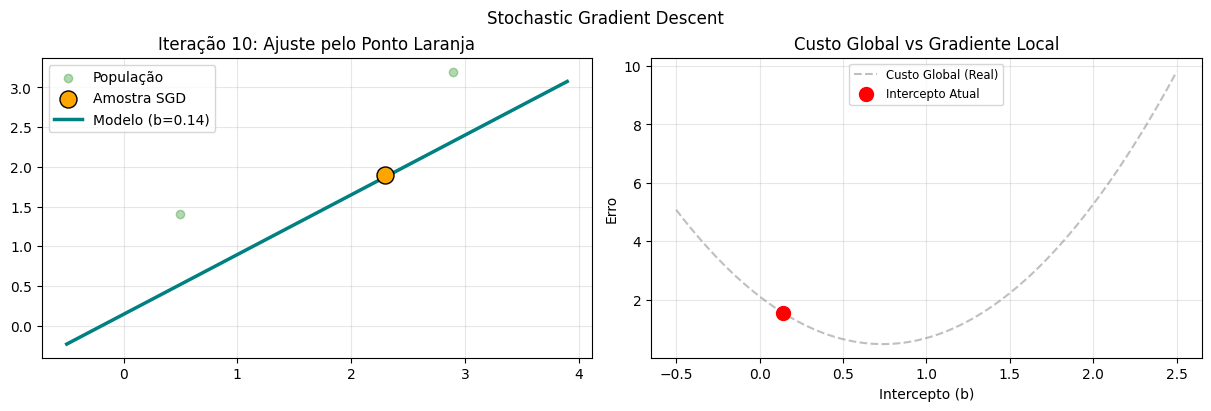

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
10  | 0.1425     | -0.0005    | 0.1430     | -0.0013    | 0.7535    


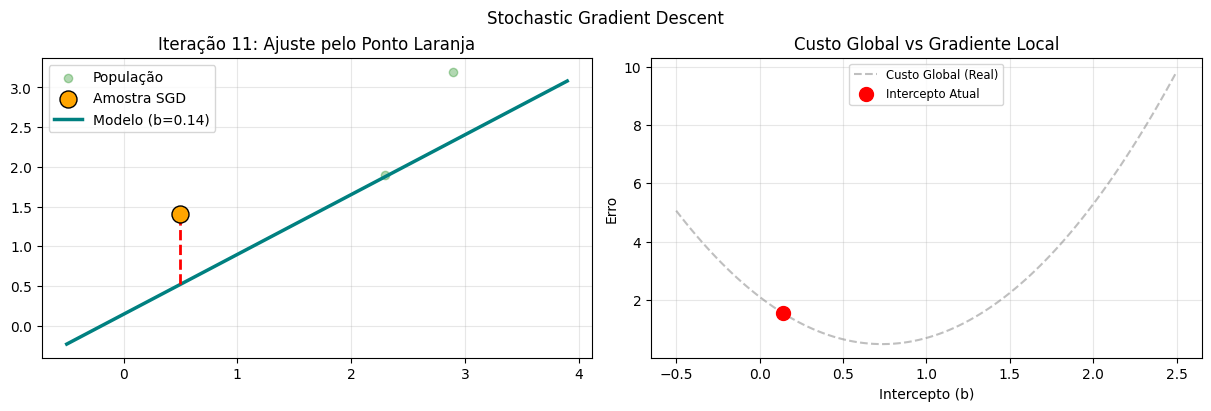

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
11  | 0.1430     | -0.0176    | 0.1606     | -0.0088    | 0.7623    


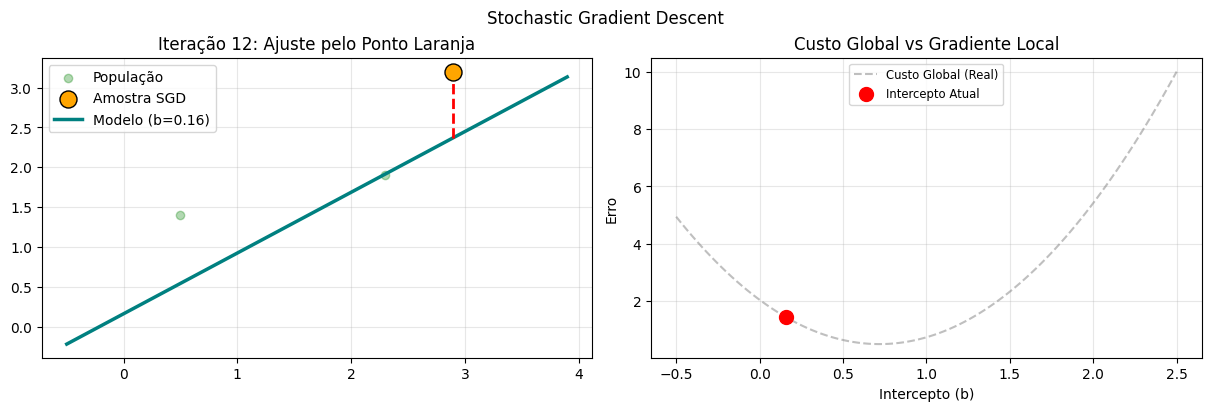

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
12  | 0.1606     | -0.0166    | 0.1772     | -0.0481    | 0.8104    


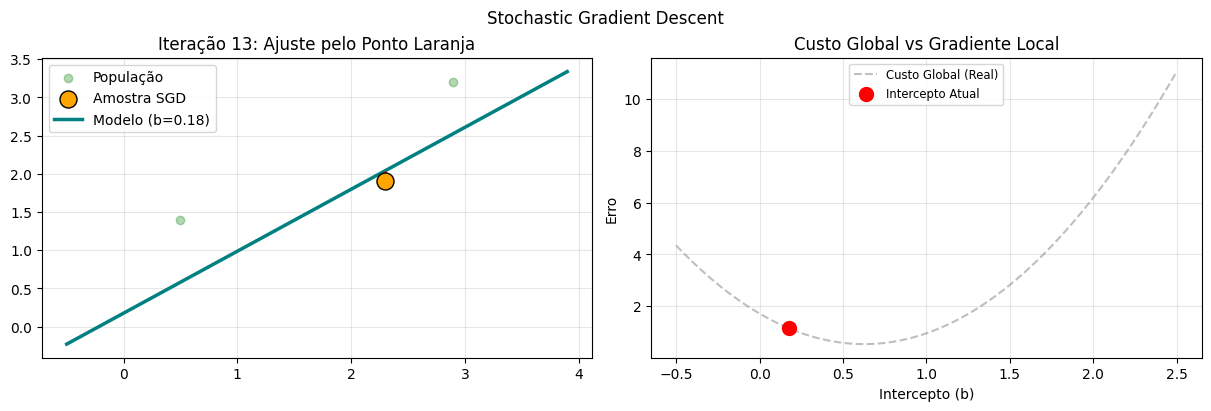

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
13  | 0.1772     | 0.0028     | 0.1744     | 0.0065     | 0.8039    


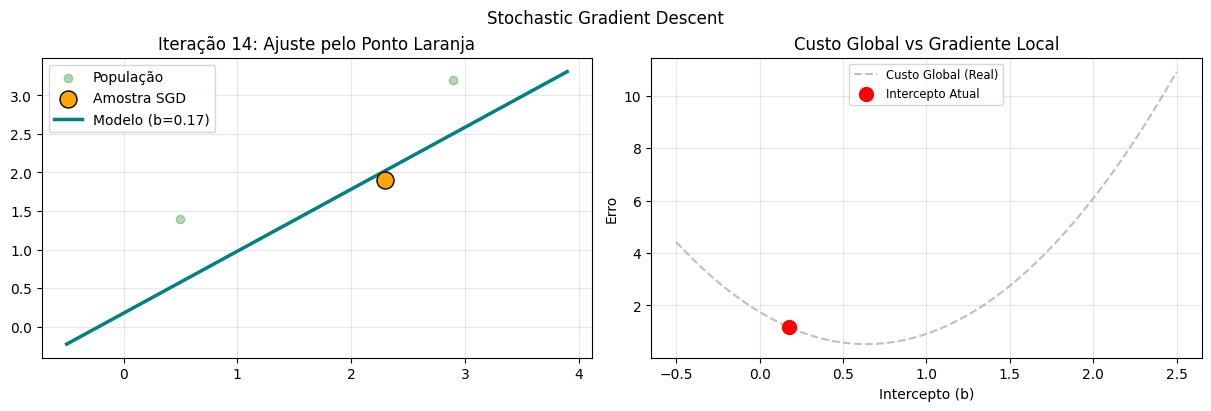

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
14  | 0.1744     | 0.0025     | 0.1719     | 0.0057     | 0.7982    


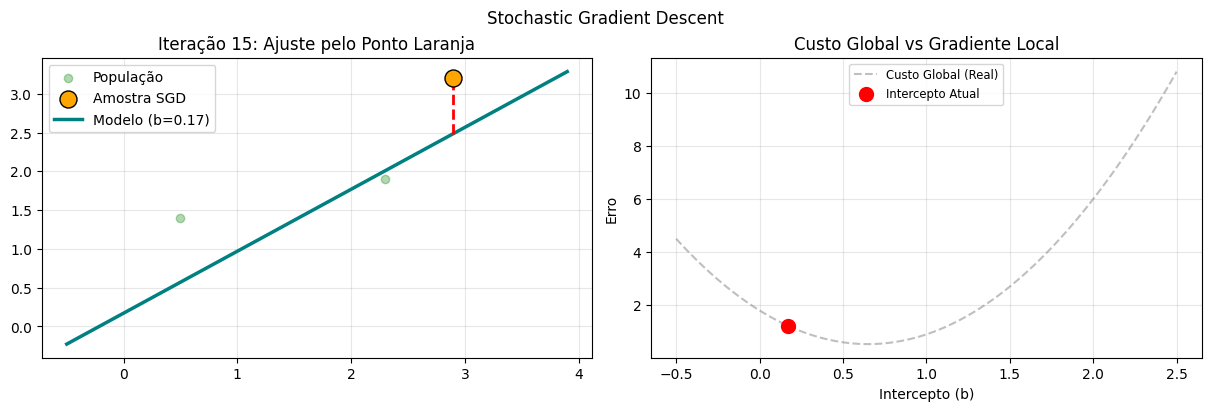

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
15  | 0.1719     | -0.0143    | 0.1862     | -0.0414    | 0.8396    


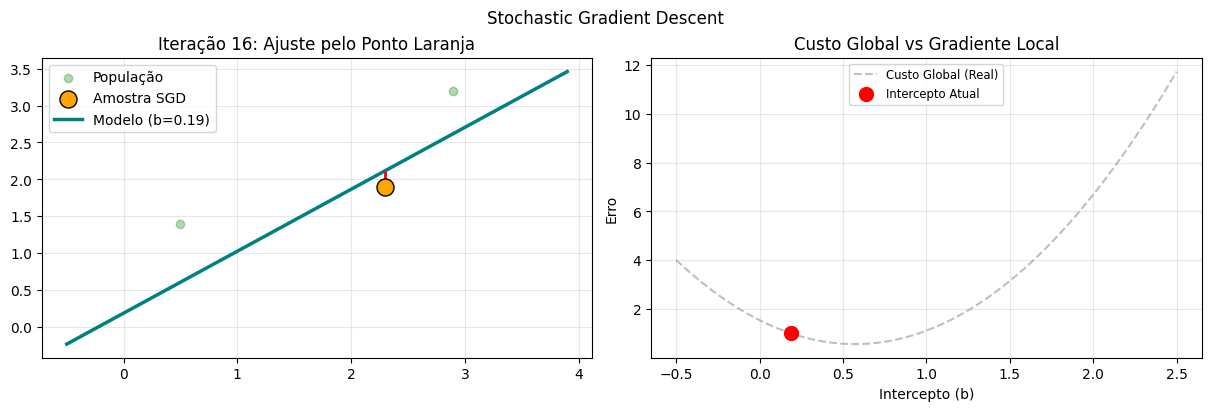

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
16  | 0.1862     | 0.0043     | 0.1818     | 0.0100     | 0.8296    


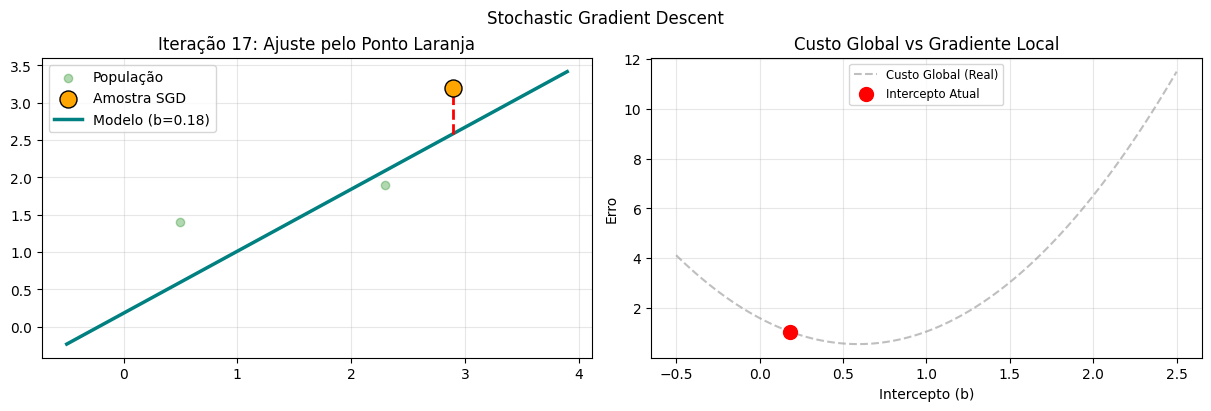

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
17  | 0.1818     | -0.0122    | 0.1941     | -0.0355    | 0.8651    


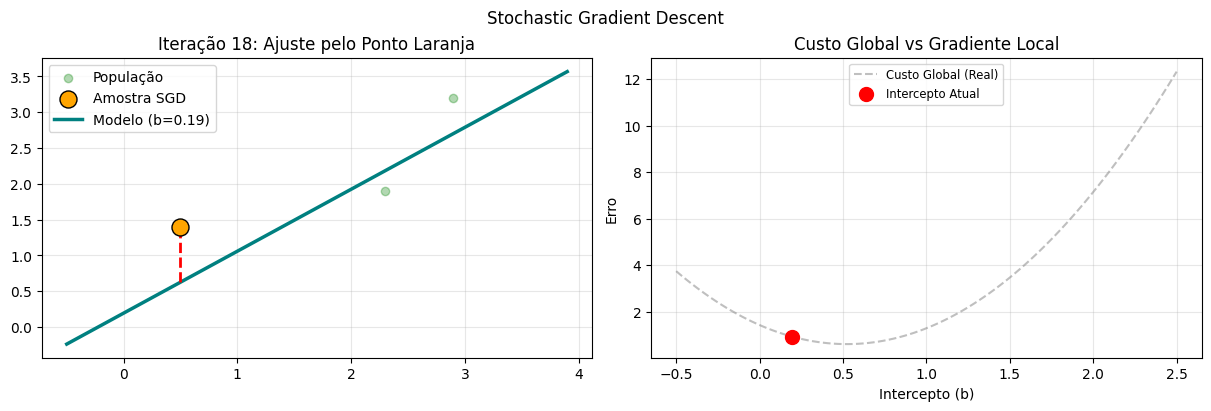

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
18  | 0.1941     | -0.0155    | 0.2095     | -0.0077    | 0.8728    


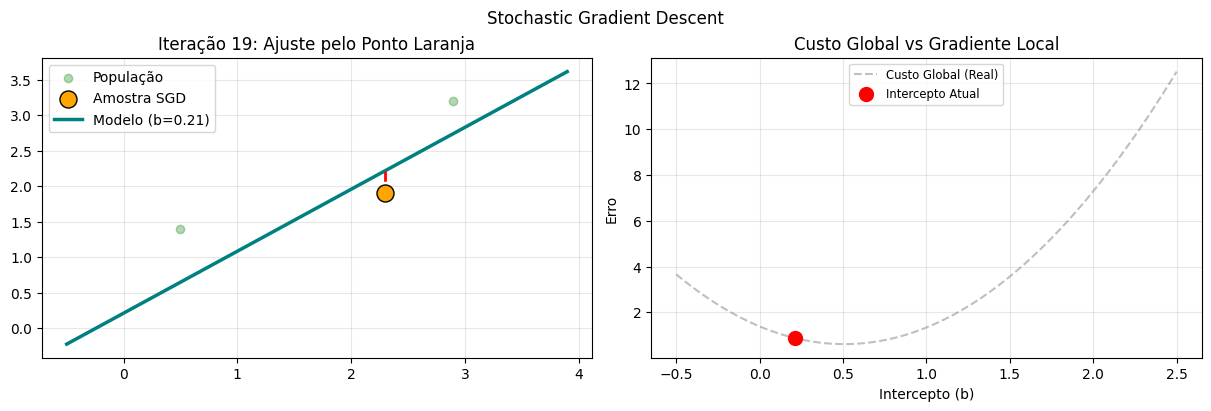

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
19  | 0.2095     | 0.0063     | 0.2032     | 0.0146     | 0.8583    


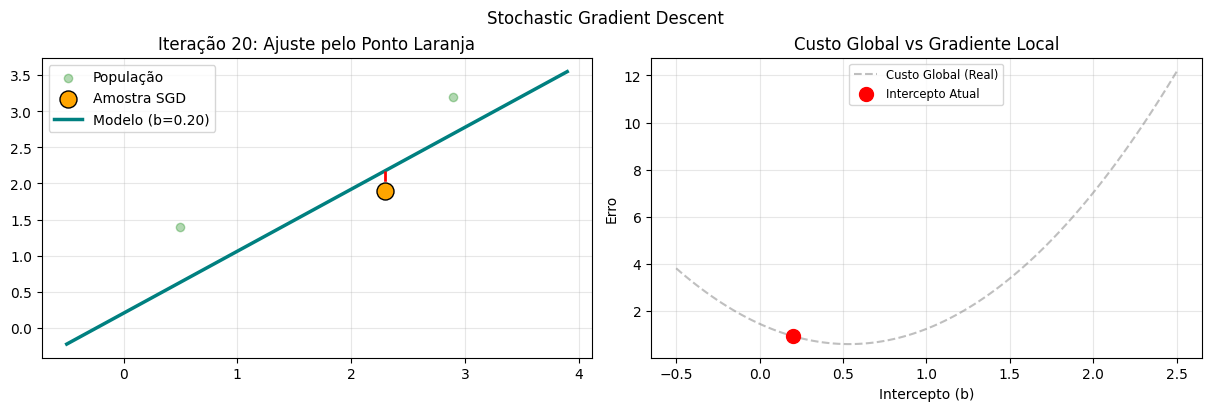

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
20  | 0.2032     | 0.0055     | 0.1977     | 0.0127     | 0.8455    


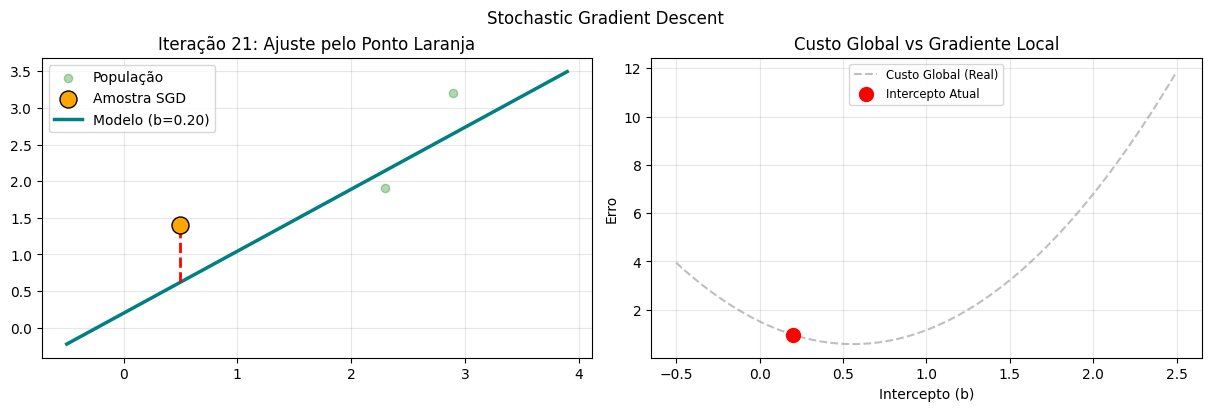

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
21  | 0.1977     | -0.0156    | 0.2132     | -0.0078    | 0.8533    


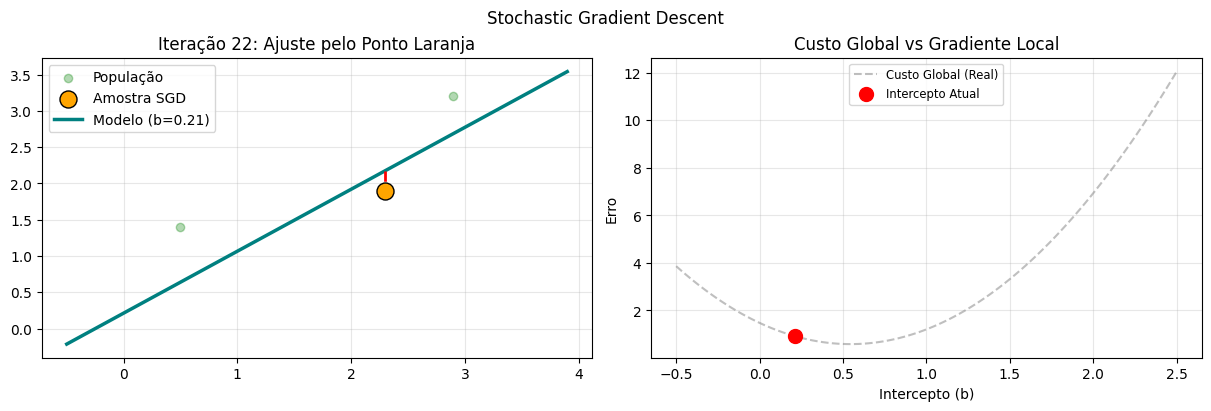

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
22  | 0.2132     | 0.0055     | 0.2077     | 0.0127     | 0.8406    


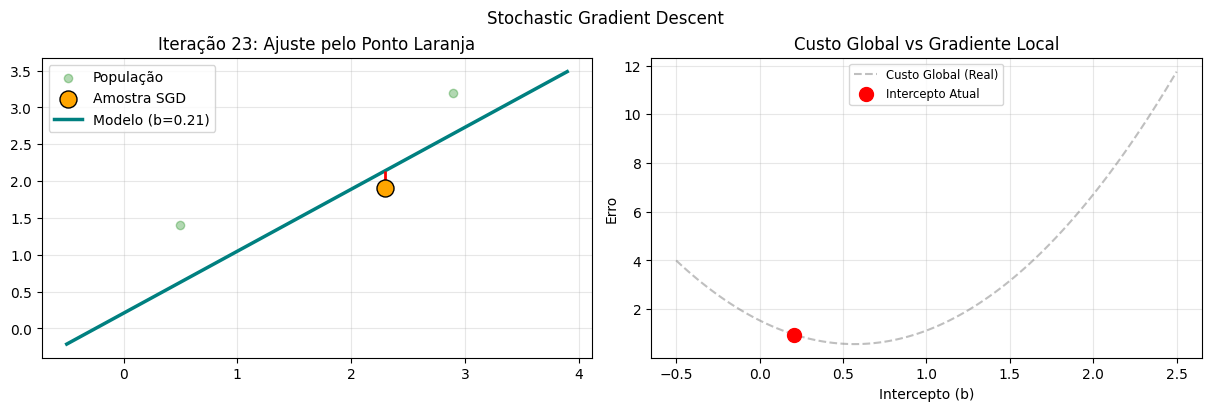

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
23  | 0.2077     | 0.0048     | 0.2029     | 0.0111     | 0.8295    


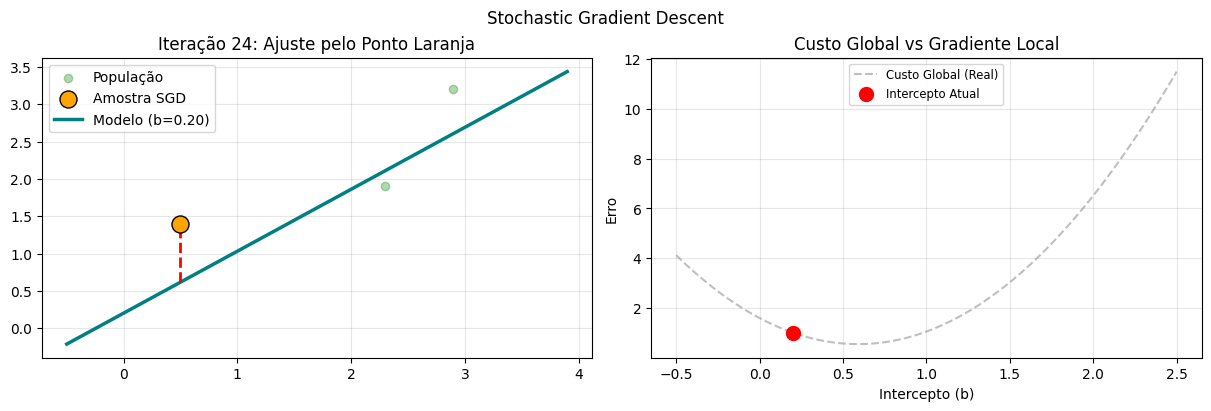

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
24  | 0.2029     | -0.0156    | 0.2186     | -0.0078    | 0.8373    


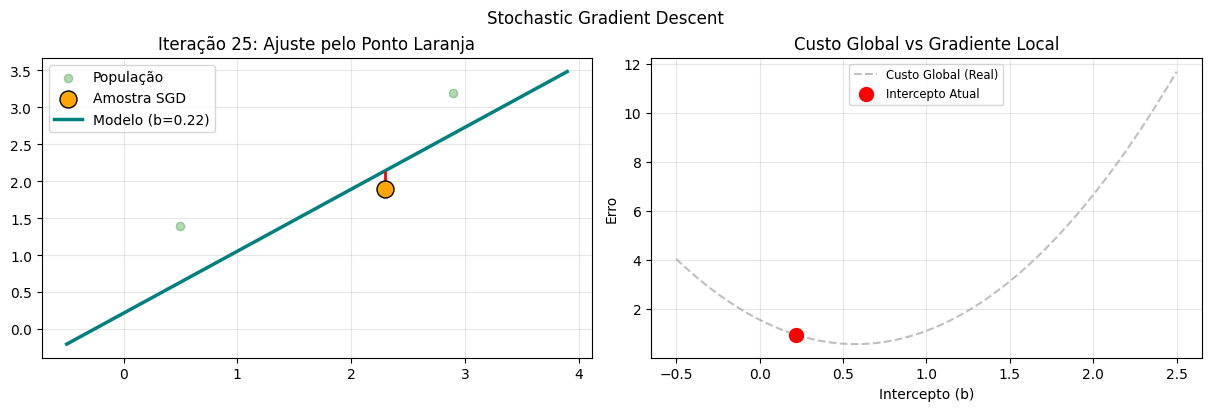

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
25  | 0.2186     | 0.0049     | 0.2137     | 0.0112     | 0.8261    


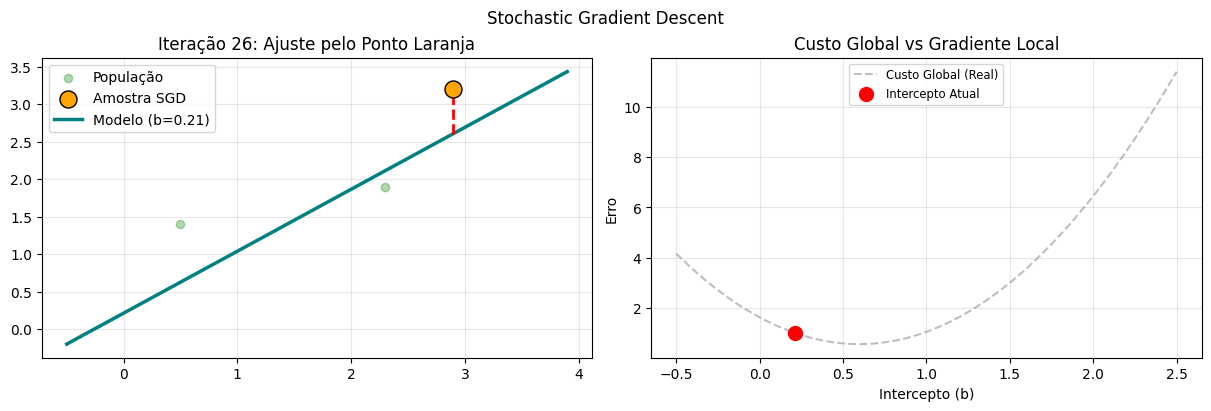

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
26  | 0.2137     | -0.0118    | 0.2255     | -0.0343    | 0.8604    


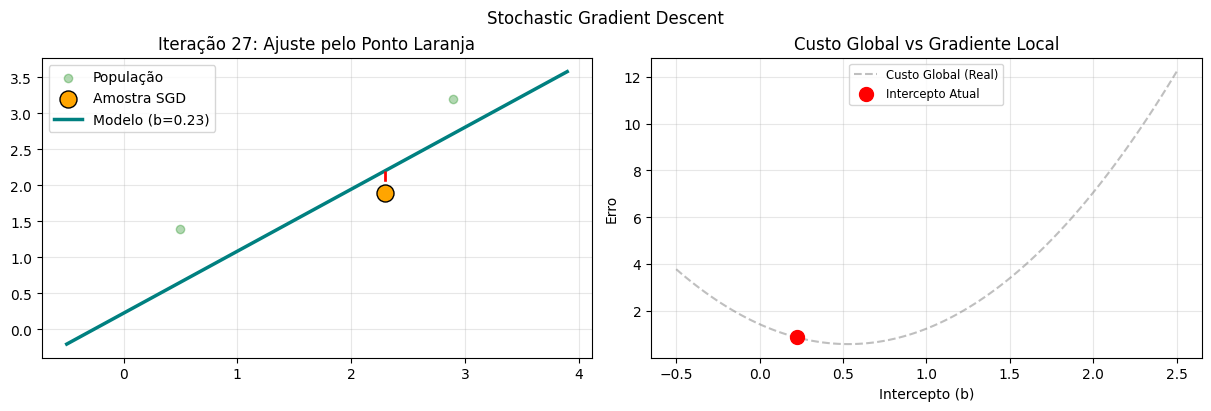

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
27  | 0.2255     | 0.0061     | 0.2194     | 0.0140     | 0.8464    


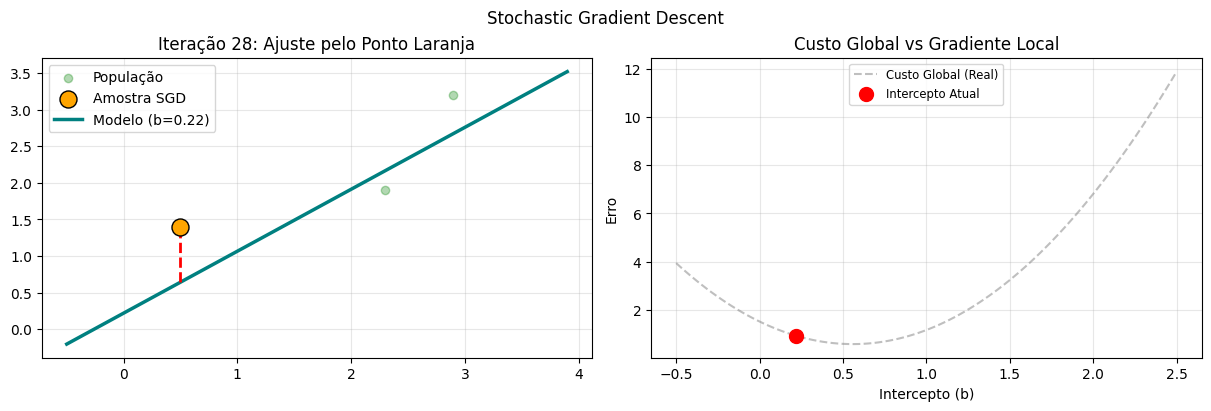

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
28  | 0.2194     | -0.0151    | 0.2345     | -0.0076    | 0.8539    


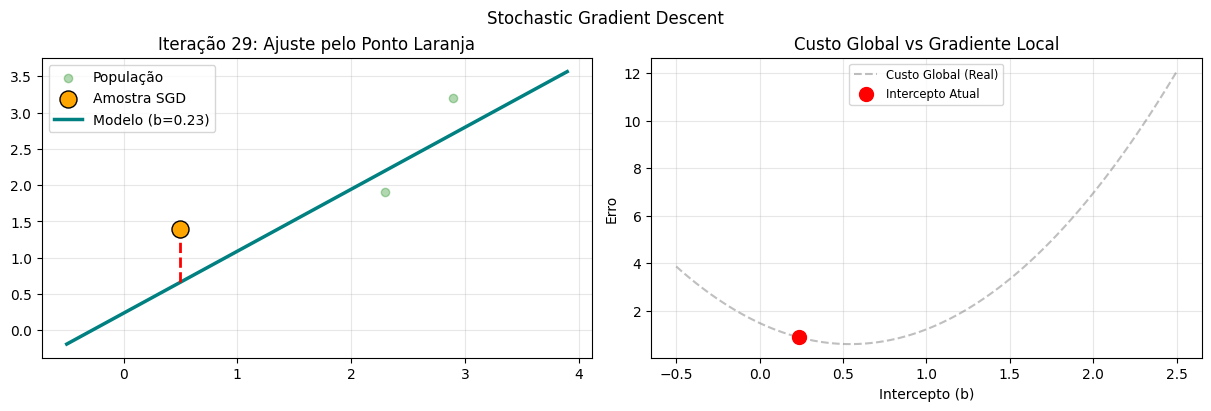

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
29  | 0.2345     | -0.0148    | 0.2493     | -0.0074    | 0.8613    


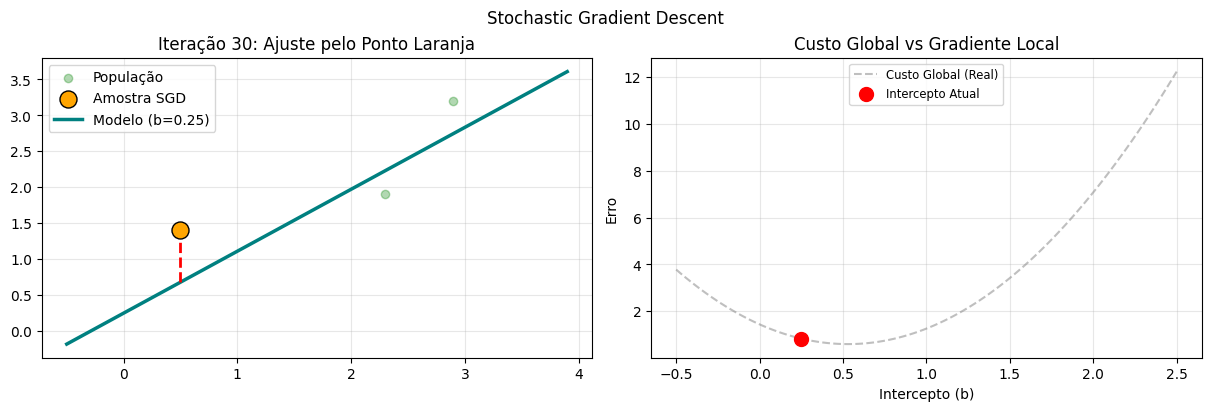

Interação | Old Intercept | Intercept Step Size | New Intercept | Slope Step Size | Slope
30  | 0.2493     | -0.0144    | 0.2637     | -0.0072    | 0.8685    


(np.float64(0.2637093908609129),
 [(0.0, np.float64(4.947500000000001)),
  (np.float64(0.023), np.float64(4.616422187500002)),
  (np.float64(0.056873000000000014), np.float64(3.162605519980956)),
  (np.float64(0.06568788180000001), np.float64(2.8964660981620756)),
  (np.float64(0.07339385146956001), np.float64(2.6769218344752974)),
  (np.float64(0.08013041015468937), np.float64(2.4950189200026527)),
  (np.float64(0.09989556451803773), np.float64(2.3100395187253957)),
  (np.float64(0.12285748663650432), np.float64(1.6976049489817975)),
  (np.float64(0.12437432574844764), np.float64(1.6687903829281918)),
  (np.float64(0.14245499298709385), np.float64(1.5452138675697165)),
  (np.float64(0.1430035450474929), np.float64(1.535604359638113)),
  (np.float64(0.16060860786657583), np.float64(1.4236113228840108)),
  (np.float64(0.17718366446368095), np.float64(1.1410490138828138)),
  (np.float64(0.17436357729166532), np.float64(1.1758855221407833)),
  (np.float64(0.17189825708588927), np.float64(

In [30]:
real_dots = np.array([[0.5, 1.4], [2.3, 1.9],[2.9, 3.2]])

stochastic_gradient_descent(
        initial_intercept=0.0,
        initial_slope=0.5,    
        real_dots=real_dots,
        learn_rate=0.01,      
        max_iterations=30
    )

## Questão D

## Questão E